In [ ]:
Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Importing the dataset and printing the first 5 entries:

In [2]:
df=pd.read_csv('Part- 1,2&3 - Signal.csv')

In [3]:
df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [ ]:
Printing the shape of the dataset:

In [4]:
df.shape

(1599, 12)

In [ ]:
It is seen that there are 1599 samples and 11 features along with Signal Strength as the target variable.

In [ ]:
Checking for the presence of null values:

In [5]:
df.isnull().any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [ ]:
There are no null values present.

In [ ]:
Checking for the type of data present in each column:

In [6]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [ ]:
It is seen that all columns, except the target variable column which in turn is of int type, are of float64 type.

In [ ]:
Obtaining the numerical analysis of data present in each column:

In [25]:
df.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  Signal_Strength  
count   1599.000000      1599.000000  
mean      10.422983         5.636023  
std        1.065668         0.807569  
min        8.400000         3.000000  
25%        9.500000         5.000000  
50%       10.200000         6.000000  
75%       11.100000         6.000000  
max       14.900000         8.000000

In [ ]:
Some columns seem to be unevenly distributed as in the case of columns 'Parameter 4','Parameter 6','Parameter 7' where the maximum value is extremely high as compared to the 75th percentile value,thereby indicating the presence of heavy skewness and outliers. In some columns such as 'Paraemter 7', the min value seems to be way smaller than the 25th percentile as well. 

In [ ]:
Obtaining a pairplot to understand the relationship between different features:

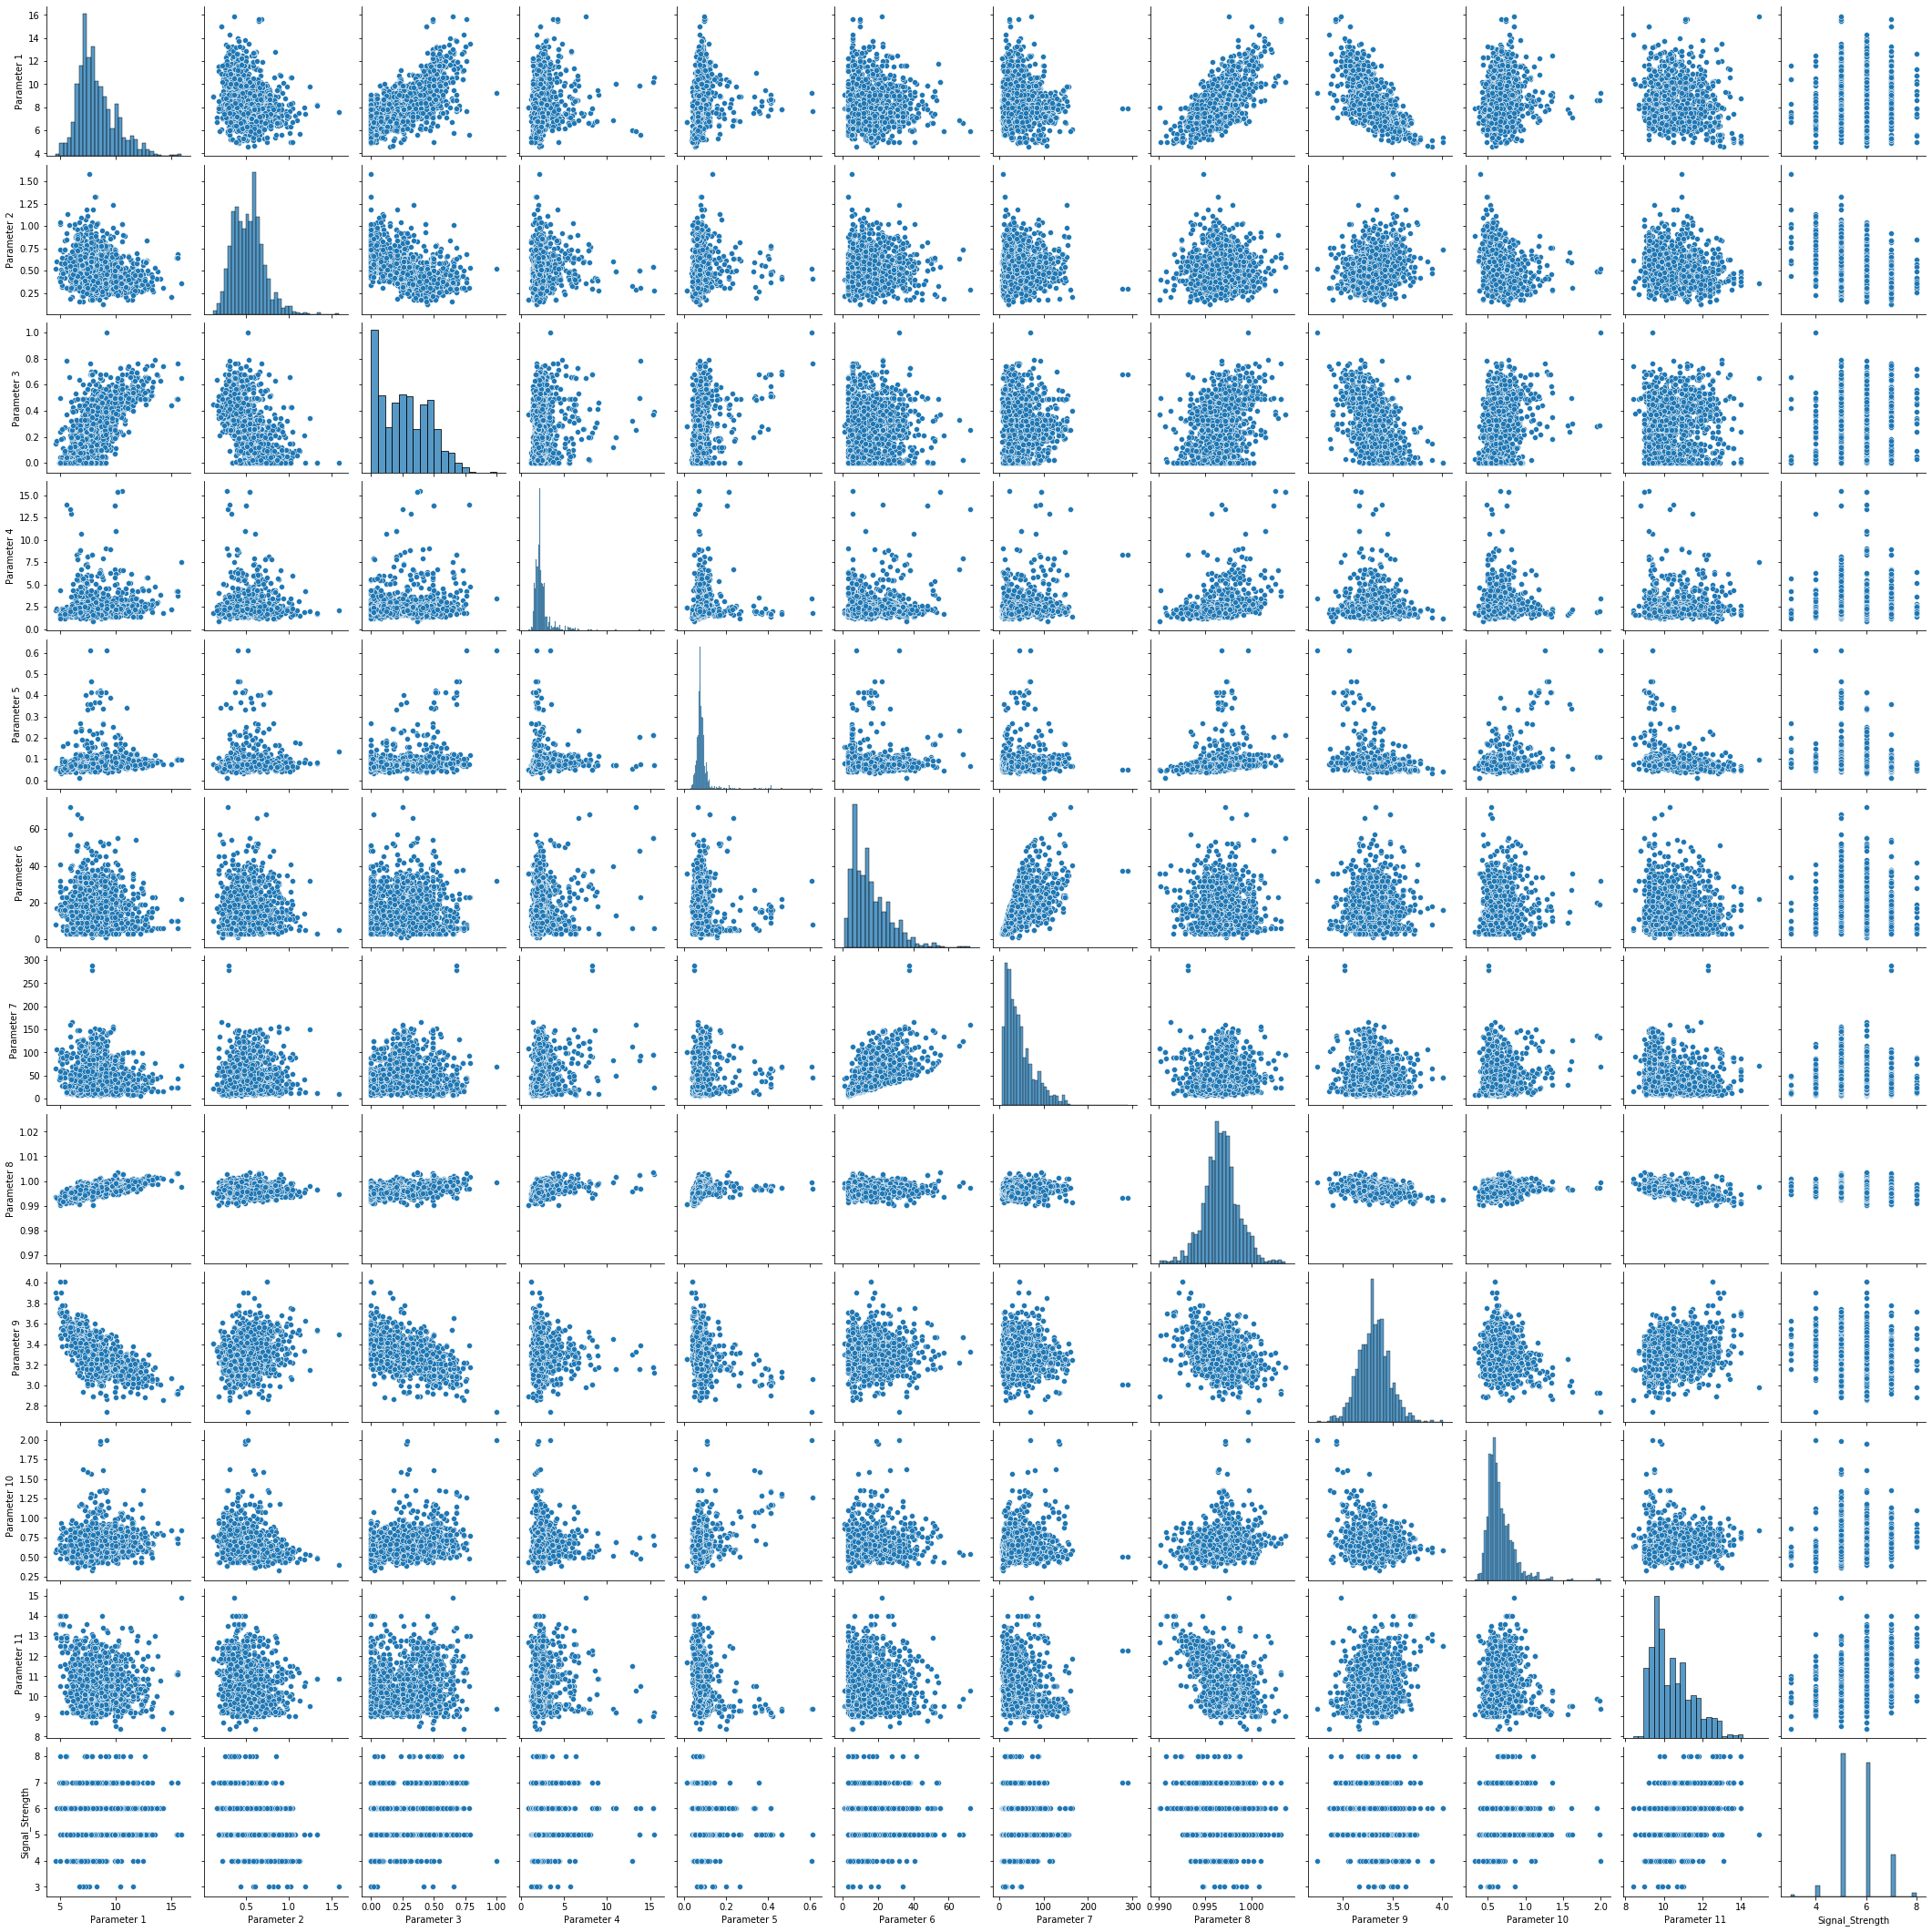

In [7]:
sns.pairplot(df)

In [ ]:
From the pairplot above, there seems to be a fair amount of positive or negative correlation between some features. Many columns seem to beheavily skewed as well.

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


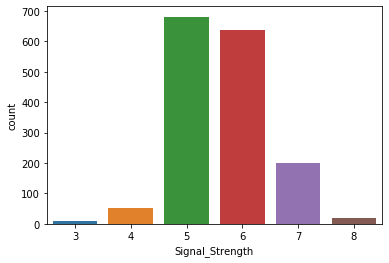

In [66]:
sns.countplot(df['Signal_Strength'])

In [ ]:
The target variable data seems to be imbalanced where the number of samples having signal strength of 3,4,7 and 8 are very less in comparison to those having signal strength 5 and 6.

In [ ]:
Obtaining the correlation values between the features:

In [11]:
df.corr()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  \
Parameter 1         1.000000    -0.256131     0.671703     0.114777   
Parameter 2        -0.256131     1.000000    -0.552496     0.001918   
Parameter 3         0.671703    -0.552496     1.000000     0.143577   
Parameter 4         0.114777     0.001918     0.143577     1.000000   
Parameter 5         0.093705     0.061298     0.203823     0.055610   
Parameter 6        -0.153794    -0.010504    -0.060978     0.187049   
Parameter 7        -0.113181     0.076470     0.035533     0.203028   
Parameter 8         0.668047     0.022026     0.364947     0.355283   
Parameter 9        -0.682978     0.234937    -0.541904    -0.085652   
Parameter 10        0.183006    -0.260987     0.312770     0.005527   
Parameter 11       -0.061668    -0.202288     0.109903     0.042075   
Signal_Strength     0.124052    -0.390558     0.226373     0.013732   

                 Parameter 5  Parameter 6  Parameter 7  Parameter 8  \
Parameter 1         0.093705    -0.153794    -0.113181     0.668047   
Parameter 2         0.061298    -0.010504     0.076470     0.022026   
Parameter 3         0.203823    -0.060978     0.035533     0.364947   
Parameter 4         0.055610     0.187049     0.203028     0.355283   
Parameter 5         1.000000     0.005562     0.047400     0.200632   
Parameter 6         0.005562     1.000000     0.667666    -0.021946   
Parameter 7         0.047400     0.667666     1.000000     0.071269   
Parameter 8         0.200632    -0.021946     0.071269     1.000000   
Parameter 9        -0.265026     0.070377    -0.066495    -0.341699   
Parameter 10        0.371260     0.051658     0.042947     0.148506   
Parameter 11       -0.221141    -0.069408    -0.205654    -0.496180   
Signal_Strength    -0.128907    -0.050656    -0.185100    -0.174919   

                 Parameter 9  Parameter 10  Parameter 11  Signal_Strength  
Parameter 1        -0.682978      0.183006     -0.061668         0.124052  
Parameter 2         0.234937     -0.260987     -0.202288        -0.390558  
Parameter 3        -0.541904      0.312770      0.109903         0.226373  
Parameter 4        -0.085652      0.005527      0.042075         0.013732  
Parameter 5        -0.265026      0.371260     -0.221141        -0.128907  
Parameter 6         0.070377      0.051658     -0.069408        -0.050656  
Parameter 7        -0.066495      0.042947     -0.205654        -0.185100  
Parameter 8        -0.341699      0.148506     -0.496180        -0.174919  
Parameter 9         1.000000     -0.196648      0.205633        -0.057731  
Parameter 10       -0.196648      1.000000      0.093595         0.251397  
Parameter 11        0.205633      0.093595      1.000000         0.476166  
Signal_Strength    -0.057731      0.251397      0.476166         1.000000

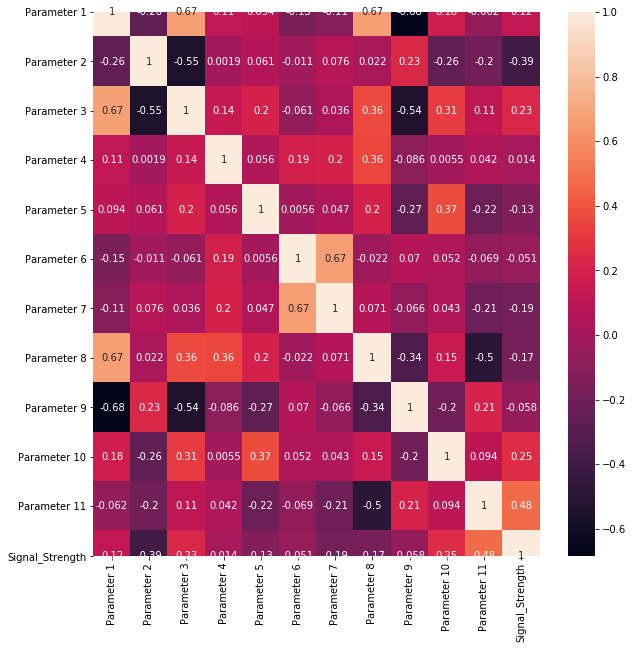

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
From the heatmap above, it can be seen that:
    i) Parameters 1 and 3 are fairly positively correlated.
    ii)Parameters 1 and 8 are positively correlated.
    iii) Parameters 6 and 7 are positively correlated.
    iv) Parameters 1 and 9 are negatively correlated
    v)Parameters 9 and 3 are negatively correlated.

In [ ]:
Measuring the skewness of data in each column:

In [19]:
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

In [ ]:
It can be seen that Parameter 1,4,5,6,7,11 are highly skewed.

In [ ]:
Plotting the univariate distributions of each column:

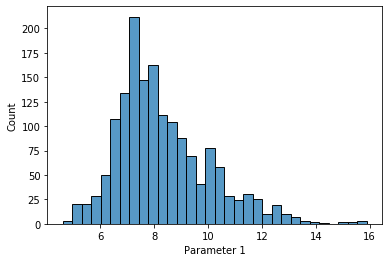

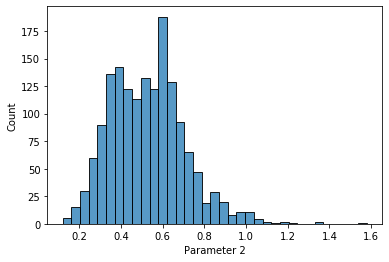

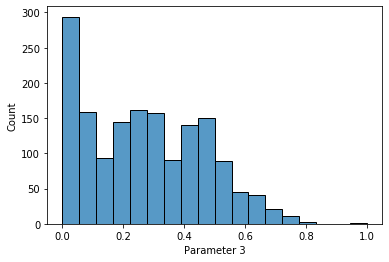

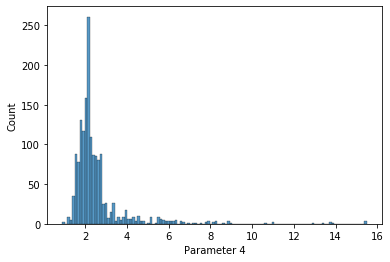

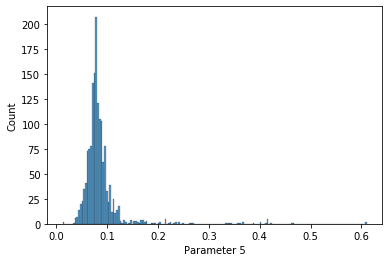

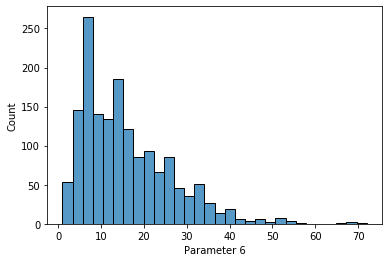

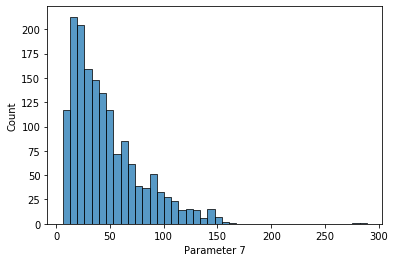

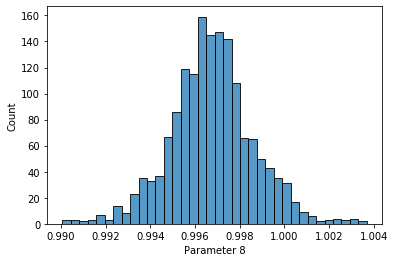

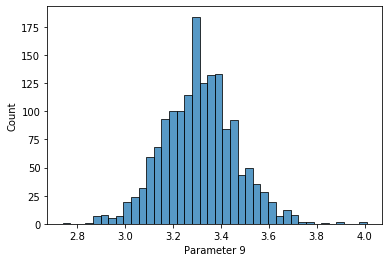

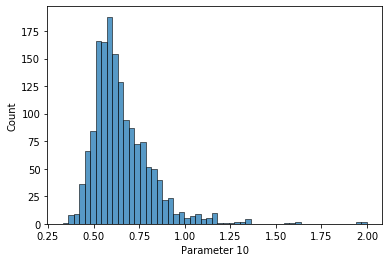

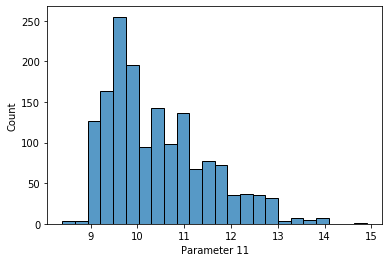

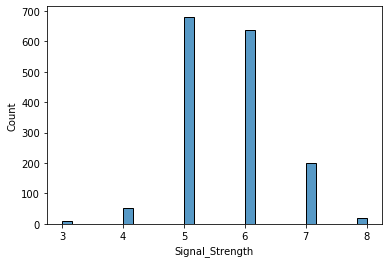

In [103]:
for col in df.describe().columns:
    sns.histplot(df[col])
    plt.show()

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


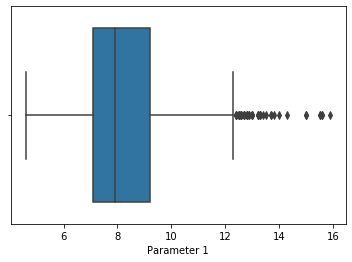

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


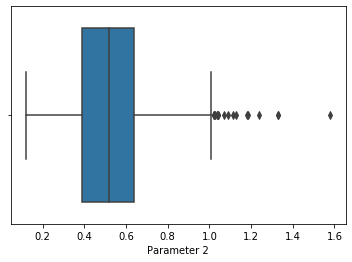

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


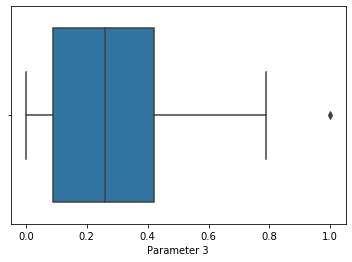

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


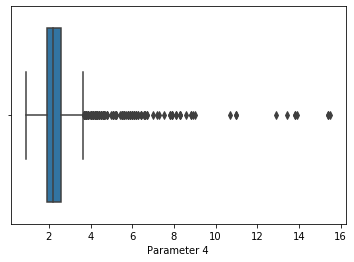

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


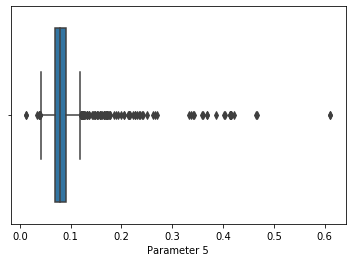

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


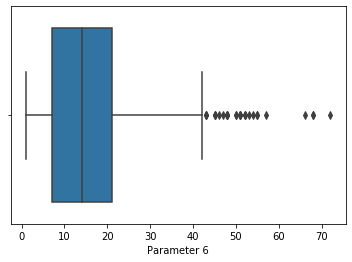

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


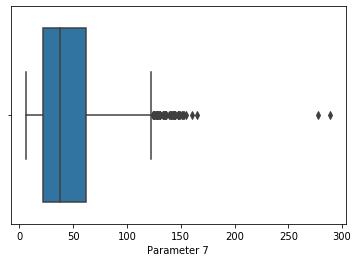

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


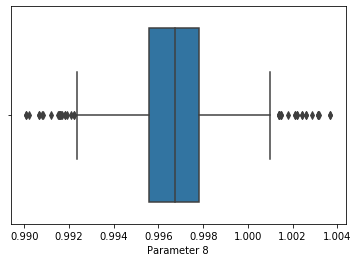

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


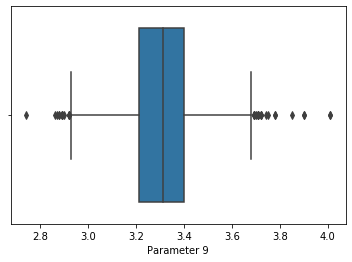

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


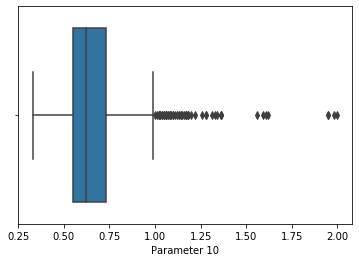

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


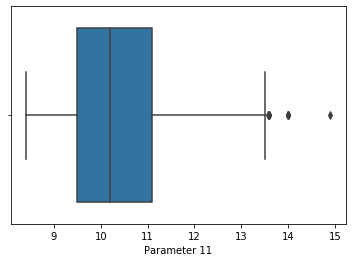

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


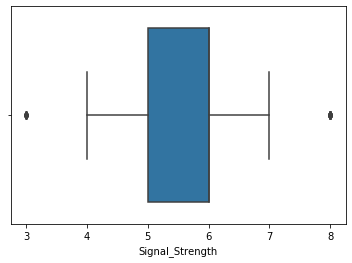

In [104]:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

In [ ]:
It is seen that there are many outliers in many columns. Removing these outliers will lead to loss of data for training. Thus we winsorize the outliers to the 25th and 75th percentile values respectively.

In [618]:
from sklearn.preprocessing import RobustScaler

In [198]:
Q1

0.59

In [3]:
x=df.drop(columns='Signal_Strength')

In [672]:
scaler = RobustScaler(unit_variance=True)
scaler.fit(x)
x1 = scaler.transform(x)

In [673]:
x1=pd.DataFrame(x1,columns=x.columns)

In [674]:
x1

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0       -0.321186     0.971265    -1.062832    -0.578134    -0.202347   
1       -0.064237     1.942530    -1.062832     0.770845     1.281531   
2       -0.064237     1.295020    -0.899320     0.192711     0.876837   
3        2.119825    -1.295020     1.226345    -0.578134    -0.269796   
4       -0.321186     0.971265    -1.062832    -0.578134    -0.202347   
...           ...          ...          ...          ...          ...   
1594    -1.092031     0.431673    -0.735807    -0.385423     0.741939   
1595    -1.284742     0.161878    -0.654051     0.000000    -1.146633   
1596    -1.027794    -0.053959    -0.531416     0.192711    -0.202347   
1597    -1.284742     0.674490    -0.572294    -0.385423    -0.269796   
1598    -1.220505    -1.133143     0.858442     2.697959    -0.809388   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0       -0.289067    -0.134898     0.633749     1.419978     -0.449660   
1        1.059912     0.978010     0.030179    -0.780988      0.449660   
2        0.096356     0.539592     0.150893    -0.354995      0.224830   
3        0.289067     0.741939     0.754463    -1.064984     -0.299773   
4       -0.289067    -0.134898     0.633749     1.419978     -0.449660   
...           ...          ...          ...          ...           ...   
1594     1.734402     0.202347    -1.116605     0.993985     -0.299773   
1595     2.408892     0.438418    -0.983820     1.490977      1.049206   
1596     1.445335     0.067449    -0.609606     0.780988      0.974263   
1597     1.734402     0.202347    -0.772570     1.845972      0.674490   
1598     0.385423     0.134898    -0.760499     0.567991      0.299773   

      Parameter 11  
0        -0.674490  
1        -0.337245  
2        -0.337245  
3        -0.337245  
4        -0.674490  
...            ...  
1594      0.252934  
1595      0.843112  
1596      0.674490  
1597      0.000000  
1598      0.674490  

[1599 rows x 11 columns]

In [632]:
x1.skew()

0     0.982751
1     0.671593
2     0.318337
3     4.540655
4     5.680347
5     1.250567
6     1.515531
7     0.071288
8     0.193683
9     2.428672
10    0.860829
dtype: float64

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


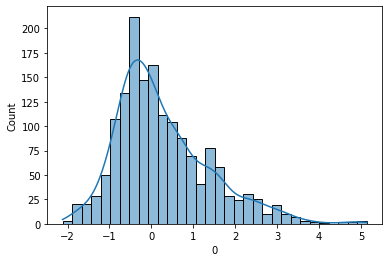

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


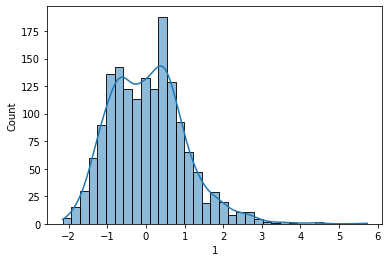

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


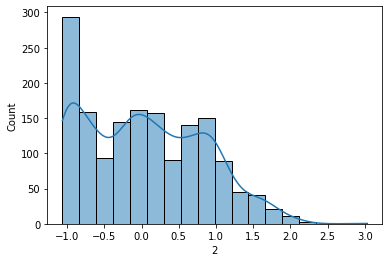

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


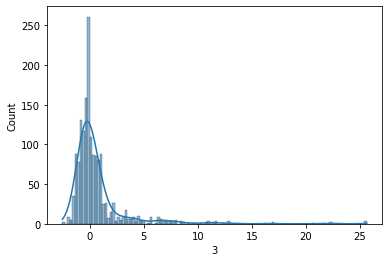

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


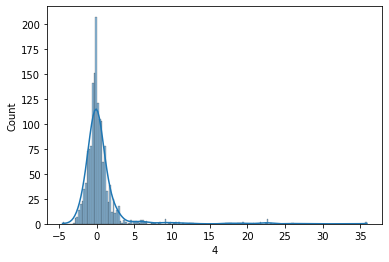

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


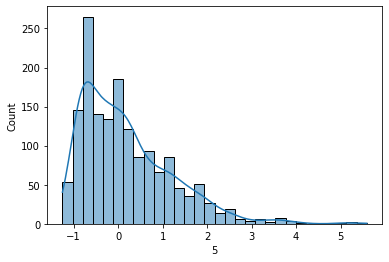

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


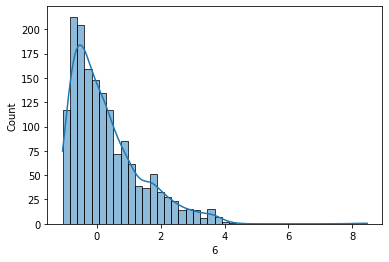

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


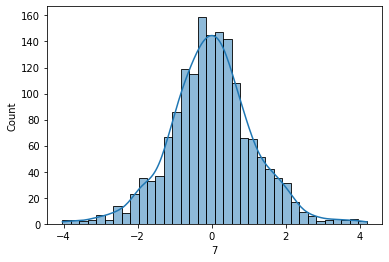

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


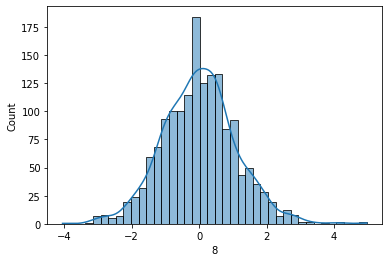

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


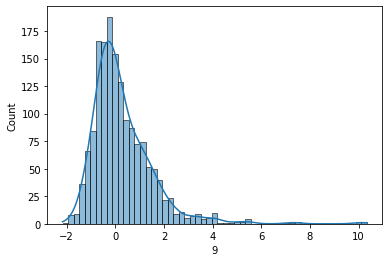

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


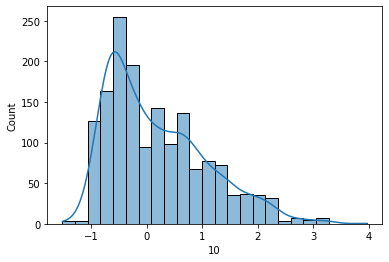

In [636]:
for col in x1.columns:
    sns.histplot(x1[col],kde=True)
    plt.show()

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


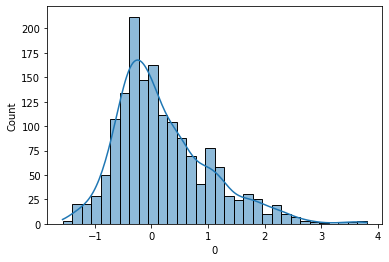

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


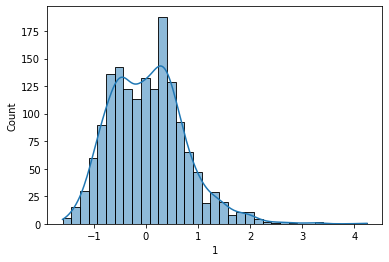

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


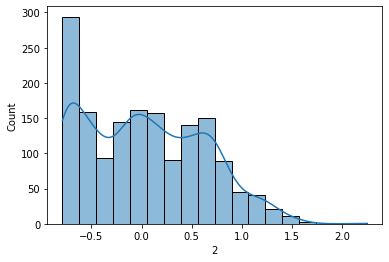

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


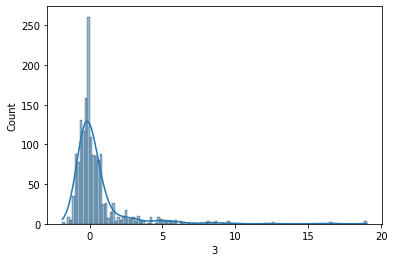

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


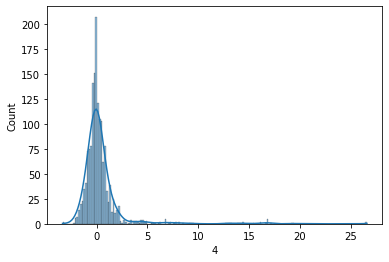

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


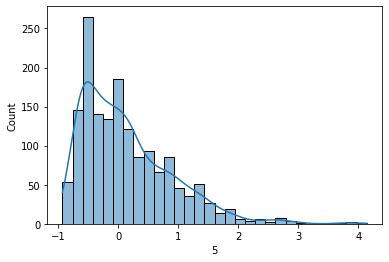

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


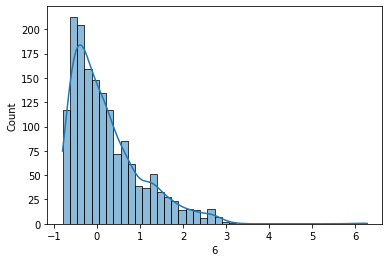

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


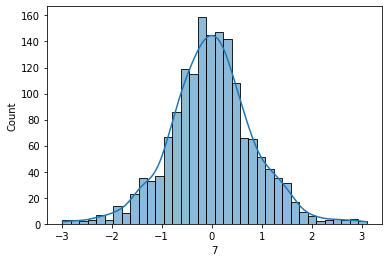

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


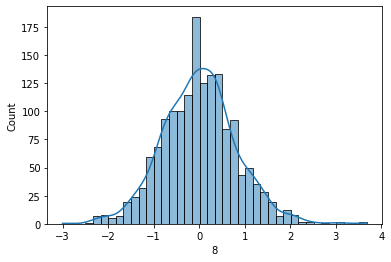

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


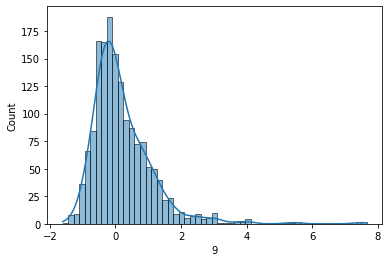

C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


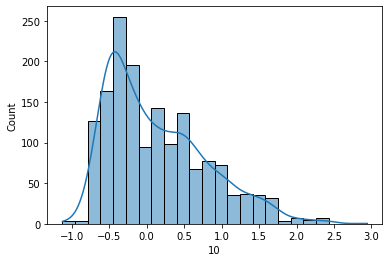

In [639]:
for col in x1.columns:
    sns.histplot(x1[col],kde=True)
    plt.show()

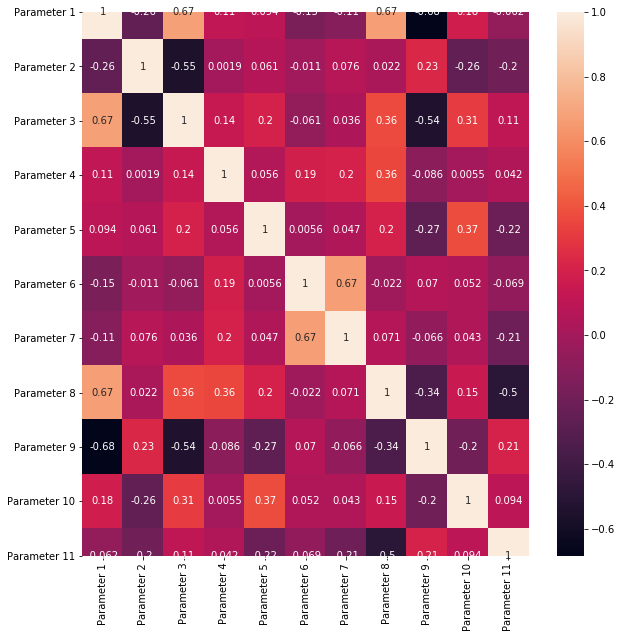

In [675]:
plt.figure(figsize=(10,10))
sns.heatmap(x1.corr(),annot=True)
plt.show()

In [4]:
for col in x.describe().columns:
    print(col)
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    val1=(Q1 - 1.5 * IQR)
    val2=(Q3 + 1.5 * IQR)
    print(Q1,Q3)
    x.loc[x[col]<(Q1 - 1.5 * IQR),col]=val1
    x.loc[x[col]>(Q3 + 1.5 * IQR),col]=val2

Parameter 1
7.1 9.2
Parameter 2
0.39 0.64
Parameter 3
0.09 0.42
Parameter 4
1.9 2.6
Parameter 5
0.07 0.09
Parameter 6
7.0 21.0
Parameter 7
22.0 62.0
Parameter 8
0.9956 0.9978349999999999
Parameter 9
3.21 3.4
Parameter 10
0.55 0.73
Parameter 11
9.5 11.1


C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


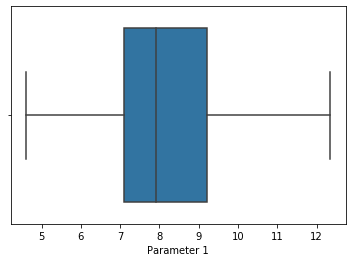

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


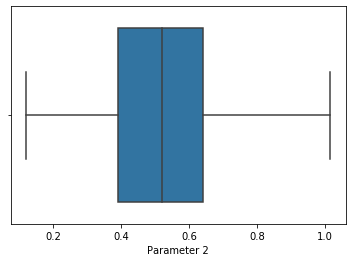

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


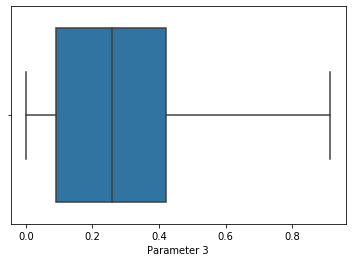

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


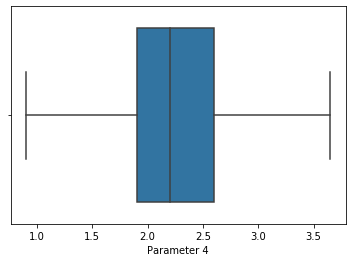

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


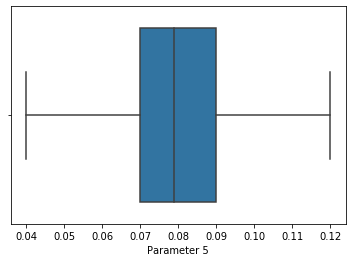

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


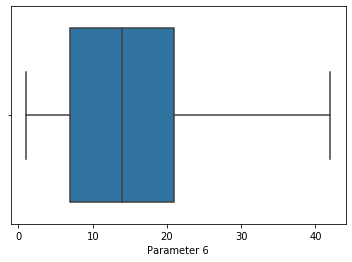

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


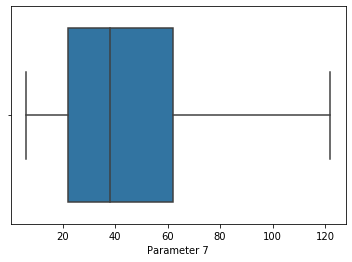

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


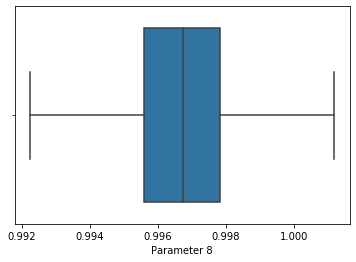

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


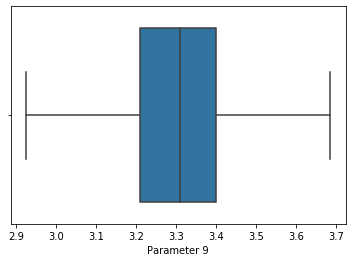

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


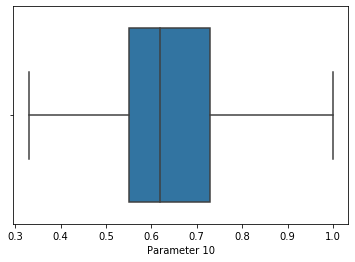

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


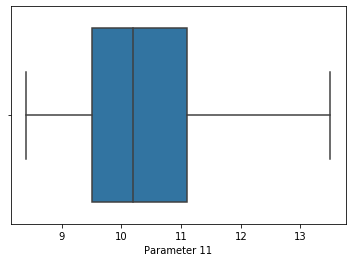

In [230]:
for col in x.describe().columns:
    sns.boxplot(x[col])
    plt.show()

In [231]:
x.skew()

Parameter 1     0.700363
Parameter 2     0.420928
Parameter 3     0.309850
Parameter 4     0.856682
Parameter 5     0.431683
Parameter 6     0.858967
Parameter 7     0.972642
Parameter 8     0.025021
Parameter 9     0.054017
Parameter 10    0.782787
Parameter 11    0.795429
dtype: float64

In [215]:
x

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0             7.4        0.700         0.00          1.9        0.076   
1             7.8        0.880         0.00          2.6        0.098   
2             7.8        0.760         0.04          2.3        0.092   
3            11.2        0.280         0.56          1.9        0.075   
4             7.4        0.700         0.00          1.9        0.076   
...           ...          ...          ...          ...          ...   
1594          6.2        0.600         0.08          2.0        0.090   
1595          5.9        0.550         0.10          2.2        0.062   
1596          6.3        0.510         0.13          2.3        0.076   
1597          5.9        0.645         0.12          2.0        0.075   
1598          6.0        0.310         0.47          3.6        0.067   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0            11.0         34.0      0.99780         3.51          0.56   
1            25.0         67.0      0.99680         3.20          0.68   
2            15.0         54.0      0.99700         3.26          0.65   
3            17.0         60.0      0.99800         3.16          0.58   
4            11.0         34.0      0.99780         3.51          0.56   
...           ...          ...          ...          ...           ...   
1594         32.0         44.0      0.99490         3.45          0.58   
1595         39.0         51.0      0.99512         3.52          0.76   
1596         29.0         40.0      0.99574         3.42          0.75   
1597         32.0         44.0      0.99547         3.57          0.71   
1598         18.0         42.0      0.99549         3.39          0.66   

      Parameter 11  
0              9.4  
1              9.8  
2              9.8  
3              9.8  
4              9.4  
...            ...  
1594          10.5  
1595          11.2  
1596          11.0  
1597          10.2  
1598          11.0  

[1599 rows x 11 columns]

In [ ]:
for col in x.describe().columns:
    Q1 = x['Parameter 1'].quantile(0.1)
    Q3 = x['Parameter 1'].quantile(0.9)
    

In [205]:
x.describe()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000   
mean      8.319637     0.527821     0.270976     2.538806     0.087467   
std       1.741096     0.179060     0.194801     1.409928     0.047065   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

       Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
count  1599.000000  1599.000000  1599.000000  1599.000000   1599.000000   
mean     15.874922    46.467792     0.996747     3.311113      0.658149   
std      10.460157    32.895324     0.001887     0.154386      0.169507   
min       1.000000     6.000000     0.990070     2.740000      0.330000   
25%       7.000000    22.000000     0.995600     3.210000      0.550000   
50%      14.000000    38.000000     0.996750     3.310000      0.620000   
75%      21.000000    62.000000     0.997835     3.400000      0.730000   
max      72.000000   289.000000     1.003690     4.010000      2.000000   

       Parameter 11  
count   1599.000000  
mean      10.422983  
std        1.065668  
min        8.400000  
25%        9.500000  
50%       10.200000  
75%       11.100000  
max       14.900000

In [8]:
y=df['Signal_Strength']

In [ ]:
Applying standardization to the input column values:

In [5]:
x_normalized=x.apply(zscore)

In [233]:
x_normalized.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0    -0.538197     0.997591    -1.392540    -0.693182    -0.291550   
1    -0.296555     2.032132    -1.392540     0.455672     0.943237   
2    -0.296555     1.342438    -1.186940    -0.036694     0.606477   
3     1.757401    -1.416339     1.485857    -0.693182    -0.347676   
4    -0.538197     0.997591    -1.392540    -0.693182    -0.291550   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0    -0.476813    -0.385806     0.585705     1.332717     -0.655496   
1     0.946759     0.700988     0.031853    -0.736650      0.220142   
2    -0.070078     0.272857     0.142624    -0.336128      0.001232   
3     0.133289     0.470456     0.696475    -1.003665     -0.509557   
4    -0.476813    -0.385806     0.585705     1.332717     -0.655496   

   Parameter 11  
0     -0.966950  
1     -0.587615  
2     -0.587615  
3     -0.587615  
4     -0.966950

In [234]:
x_normalized.describe()

Parameter 1   Parameter 2   Parameter 3   Parameter 4   Parameter 5  \
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03   
mean   3.199442e-16 -2.044088e-16 -2.132961e-16  1.688594e-16 -6.043390e-16   
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00   
min   -2.229691e+00 -2.335931e+00 -1.392540e+00 -2.334403e+00 -2.312109e+00   
25%   -7.194288e-01 -7.841191e-01 -9.299405e-01 -6.931822e-01 -6.283097e-01   
50%   -2.361449e-01 -3.695047e-02 -5.614135e-02 -2.008160e-01 -1.231698e-01   
75%    5.491914e-01  6.527436e-01  7.662579e-01  4.556722e-01  4.942235e-01   
max    2.452122e+00  2.808038e+00  3.310555e+00  2.178954e+00  2.178023e+00   

        Parameter 6   Parameter 7   Parameter 8   Parameter 9  Parameter 10  \
count  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03  1.599000e+03   
mean   7.998605e-17 -3.554936e-17 -1.560617e-14 -1.493073e-15  1.910778e-16   
std    1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00  1.000313e+00   
min   -1.493650e+00 -1.307935e+00 -2.489555e+00 -2.572379e+00 -2.333802e+00   
25%   -8.835481e-01 -7.810041e-01 -6.327683e-01 -6.698964e-01 -7.284661e-01   
50%   -1.717621e-01 -2.540735e-01  4.160813e-03 -2.358717e-03 -2.176773e-01   
75%    5.400238e-01  5.363224e-01  6.050895e-01  5.984252e-01  5.849907e-01   
max    2.675381e+00  2.512312e+00  2.461876e+00  2.500908e+00  2.555176e+00   

       Parameter 11  
count  1.599000e+03  
mean   2.310708e-15  
std    1.000313e+00  
min   -1.915286e+00  
25%   -8.721159e-01  
50%   -2.082802e-01  
75%    6.452229e-01  
max    2.921231e+00

In [ ]:
Applying PCA to the data:

In [12]:
from sklearn.decomposition import PCA

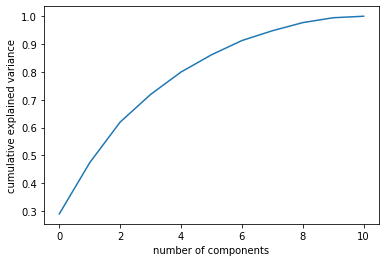

In [236]:
pca = PCA().fit(x_normalized)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
It is seen that nearly 95% of the variance is achieved using 7 components. The PCA below is however fit to 100% variance by making use of all 11 components.

In [237]:
pca = PCA(n_components=11)
pca.fit(x_normalized)
x_pca = pca.transform(x_normalized)

In [238]:
x_pca1=pd.DataFrame(x_pca)

In [30]:
x_normalized.corr()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
Parameter 1      1.000000    -0.256131     0.671703     0.114777     0.093705   
Parameter 2     -0.256131     1.000000    -0.552496     0.001918     0.061298   
Parameter 3      0.671703    -0.552496     1.000000     0.143577     0.203823   
Parameter 4      0.114777     0.001918     0.143577     1.000000     0.055610   
Parameter 5      0.093705     0.061298     0.203823     0.055610     1.000000   
Parameter 6     -0.153794    -0.010504    -0.060978     0.187049     0.005562   
Parameter 7     -0.113181     0.076470     0.035533     0.203028     0.047400   
Parameter 8      0.668047     0.022026     0.364947     0.355283     0.200632   
Parameter 9     -0.682978     0.234937    -0.541904    -0.085652    -0.265026   
Parameter 10     0.183006    -0.260987     0.312770     0.005527     0.371260   
Parameter 11    -0.061668    -0.202288     0.109903     0.042075    -0.221141   

              Parameter 6  Parameter 7  Parameter 8  Parameter 9  \
Parameter 1     -0.153794    -0.113181     0.668047    -0.682978   
Parameter 2     -0.010504     0.076470     0.022026     0.234937   
Parameter 3     -0.060978     0.035533     0.364947    -0.541904   
Parameter 4      0.187049     0.203028     0.355283    -0.085652   
Parameter 5      0.005562     0.047400     0.200632    -0.265026   
Parameter 6      1.000000     0.667666    -0.021946     0.070377   
Parameter 7      0.667666     1.000000     0.071269    -0.066495   
Parameter 8     -0.021946     0.071269     1.000000    -0.341699   
Parameter 9      0.070377    -0.066495    -0.341699     1.000000   
Parameter 10     0.051658     0.042947     0.148506    -0.196648   
Parameter 11    -0.069408    -0.205654    -0.496180     0.205633   

              Parameter 10  Parameter 11  
Parameter 1       0.183006     -0.061668  
Parameter 2      -0.260987     -0.202288  
Parameter 3       0.312770      0.109903  
Parameter 4       0.005527      0.042075  
Parameter 5       0.371260     -0.221141  
Parameter 6       0.051658     -0.069408  
Parameter 7       0.042947     -0.205654  
Parameter 8       0.148506     -0.496180  
Parameter 9      -0.196648      0.205633  
Parameter 10      1.000000      0.093595  
Parameter 11      0.093595      1.000000

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

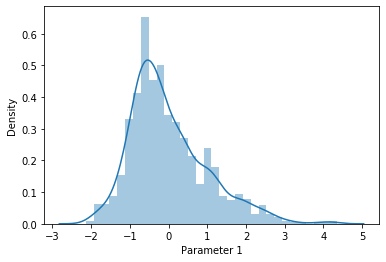

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

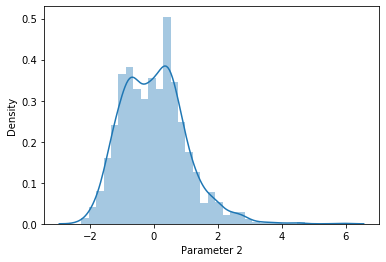

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

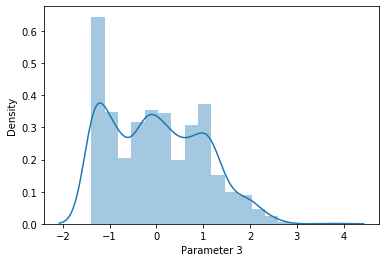

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

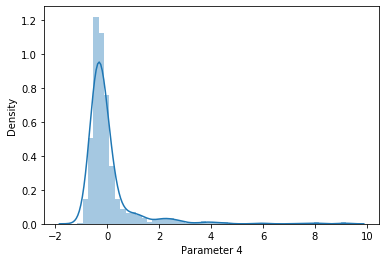

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

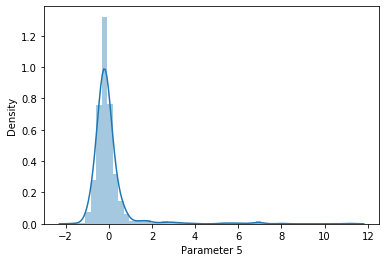

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

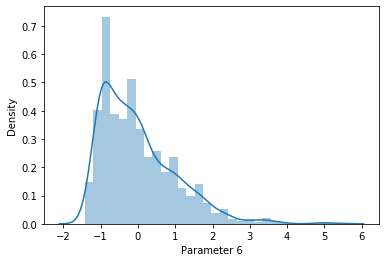

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

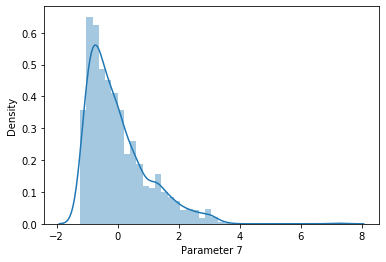

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

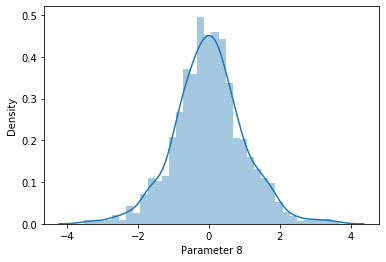

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

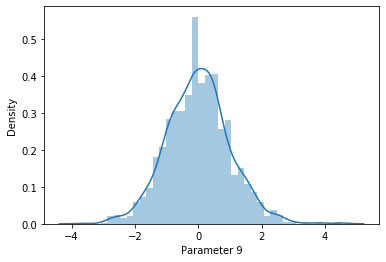

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

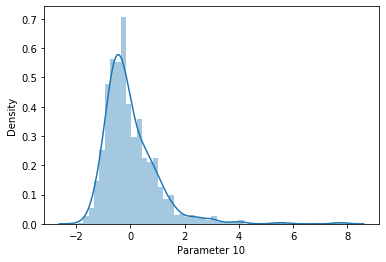

C:\Program Files\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Program Files\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Su

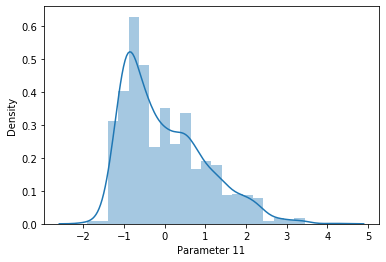

In [139]:
for col in x_normalized.describe().columns:
    sns.distplot(x_normalized[col])
    plt.show()

In [33]:
x_pca1.corr()

0             1             2             3             4  \
0  1.000000e+00 -1.214173e-16  1.585272e-16 -3.053454e-16  1.960174e-16   
1 -1.214173e-16  1.000000e+00  7.101683e-16  5.040884e-16 -2.755622e-16   
2  1.585272e-16  7.101683e-16  1.000000e+00  2.202606e-16  2.664913e-16   
3 -3.053454e-16  5.040884e-16  2.202606e-16  1.000000e+00  5.340250e-16   
4  1.960174e-16 -2.755622e-16  2.664913e-16  5.340250e-16  1.000000e+00   
5 -7.636775e-16 -2.975417e-17  3.421115e-16  7.564570e-16  7.113133e-16   
6  4.506889e-16  1.433378e-16 -1.723737e-16  2.787308e-16  1.126357e-16   
7 -1.089877e-15  3.812171e-16  4.497050e-16  1.165388e-16 -3.263686e-16   
8  1.185960e-15 -7.013898e-17 -2.160812e-16  3.350118e-17 -8.559056e-16   
9  7.667517e-16 -7.931241e-16 -8.904101e-17 -5.017493e-16 -3.404403e-16   

              5             6             7             8             9  
0 -7.636775e-16  4.506889e-16 -1.089877e-15  1.185960e-15  7.667517e-16  
1 -2.975417e-17  1.433378e-16  3.812171e-16 -7.013898e-17 -7.931241e-16  
2  3.421115e-16 -1.723737e-16  4.497050e-16 -2.160812e-16 -8.904101e-17  
3  7.564570e-16  2.787308e-16  1.165388e-16  3.350118e-17 -5.017493e-16  
4  7.113133e-16  1.126357e-16 -3.263686e-16 -8.559056e-16 -3.404403e-16  
5  1.000000e+00 -1.043930e-16 -2.706496e-16  7.143247e-16 -5.330214e-17  
6 -1.043930e-16  1.000000e+00 -1.369165e-16 -4.663886e-16 -2.112660e-17  
7 -2.706496e-16 -1.369165e-16  1.000000e+00  2.966824e-16 -2.387719e-16  
8  7.143247e-16 -4.663886e-16  2.966824e-16  1.000000e+00 -5.261791e-16  
9 -5.330214e-17 -2.112660e-17 -2.387719e-16 -5.261791e-16  1.000000e+00

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


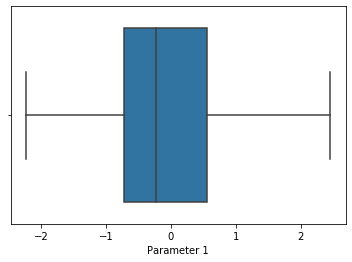

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


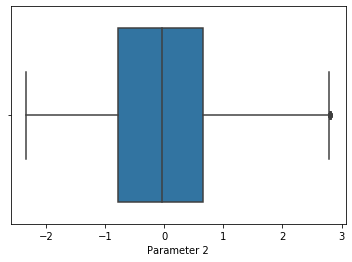

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


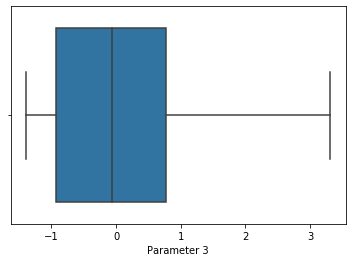

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


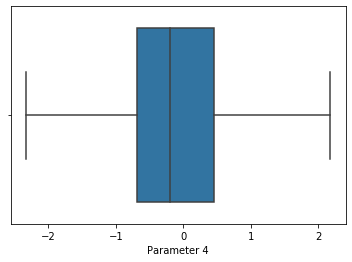

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


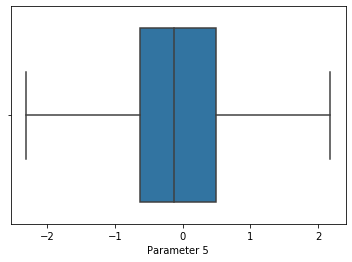

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


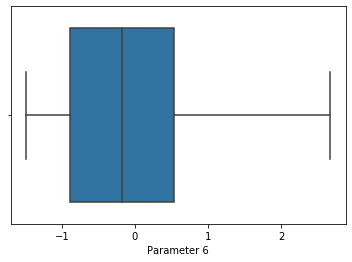

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


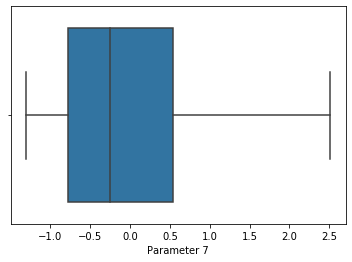

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


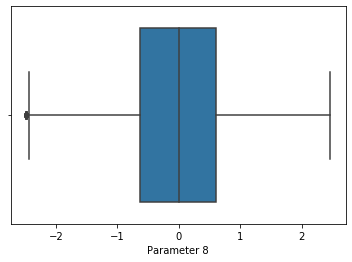

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


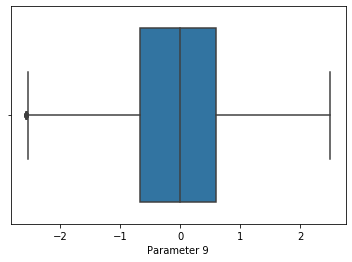

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


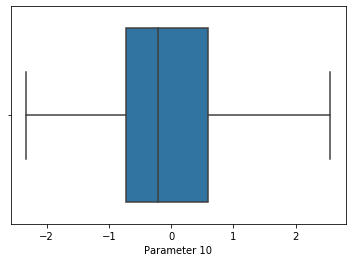

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


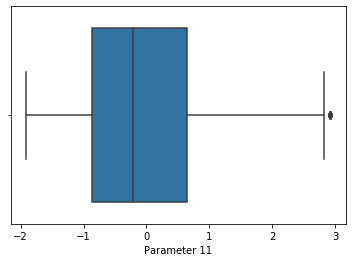

In [239]:
for col in x_normalized.describe().columns:
    sns.boxplot(x_normalized[col])
    plt.show()

In [ ]:
Using Correlation and Random Forest Classifier to select the important features:

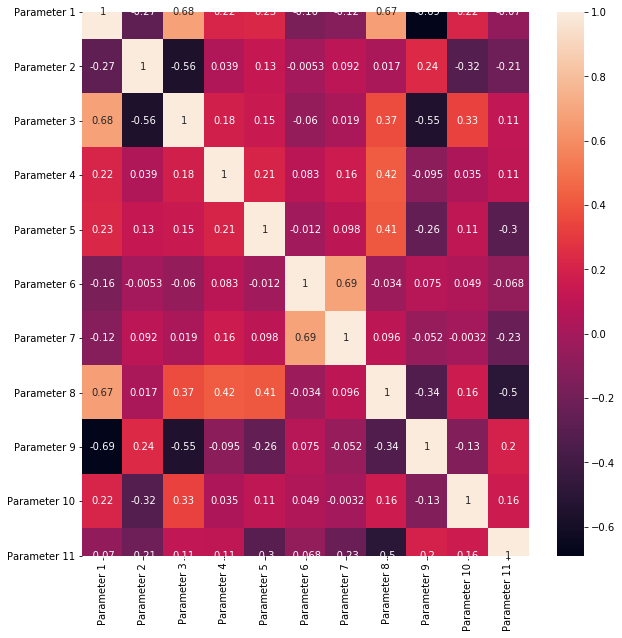

In [494]:
plt.figure(figsize=(10,10))
sns.heatmap(x_normalized.corr(),annot=True)

<BarContainer object of 11 artists>

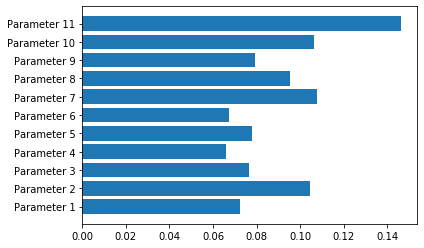

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_normalized, y)

plt.barh(x_normalized.columns, rf.feature_importances_)

In [6]:
x_normalized1=x_normalized.drop(columns=['Parameter 4','Parameter 6','Parameter 1','Parameter 3'])

In [ ]:
From the above plots, it can be seen that parameters 4,6,1 and 3 are correlated with other parameters and also possess less importance. Thus they are removed from the input data and stored separately for use in later analysis of performance of neural network training.

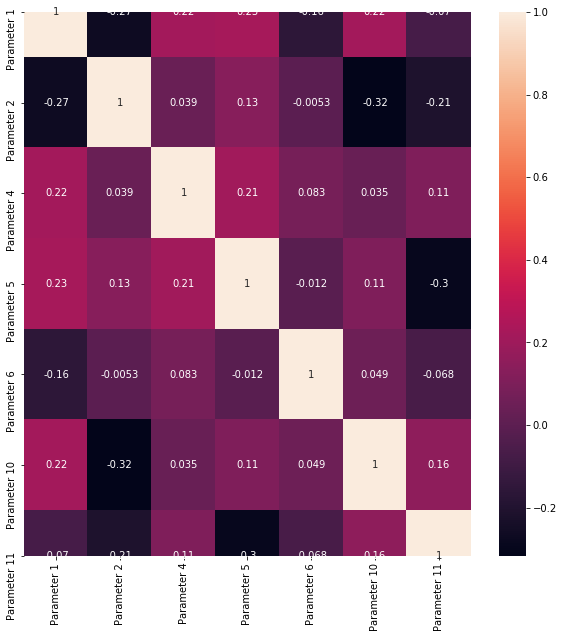

In [807]:
plt.figure(figsize=(10,10))
sns.heatmap(x_normalized1.corr(),annot=True)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(x_pca1, y,random_state=42)

In [ ]:
First the neural network will be trained using all 11 features without PCA or elimination of features. In order to resample the data and balance all target outputs, ADASYN resampling method is used where samples are generated according to their distribution:

In [9]:
classes=y.unique().tolist()

In [9]:
classes

[5, 6, 7, 4, 8, 3]

In [383]:
y[(y==5) | (y==6)]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: Signal_Strength, Length: 1319, dtype: int64

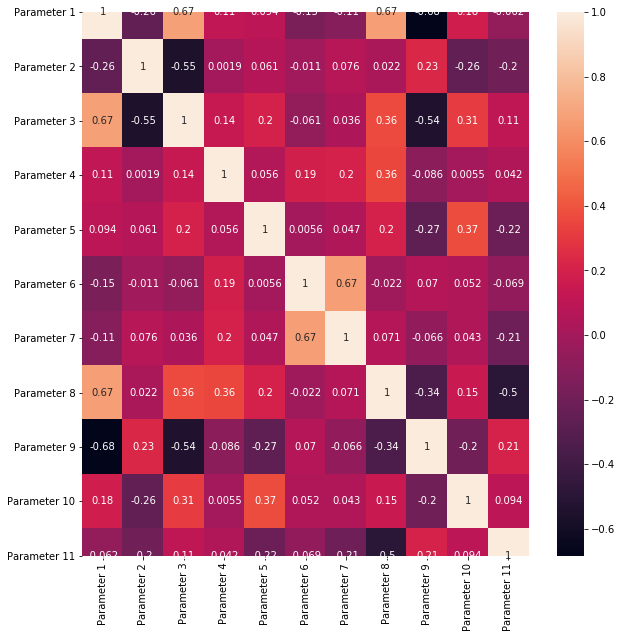

In [746]:
plt.figure(figsize=(10,10))
sns.heatmap(x1.corr(),annot=True)
plt.show()

In [ ]:
Resampling using all 11 features:

In [10]:
from imblearn.over_sampling import ADASYN

# create the object to resample theminority majority class.
adasyn = ADASYN(sampling_strategy='minority',n_neighbors=3)
x_adasyn1 = x_normalized
y_adasyn1 = y

for cl in classes[2:]:
    print(cl)
    # fit the object to the training data.
    x_adasyn1, y_adasyn1 = adasyn.fit_resample(x_adasyn1, y_adasyn1)

7
4
8
3


In [ ]:
Since sampling using Adasyn works using only 1 minority class per iteration and the gien data has several minority classes, the sampling is reiterated in order to balance all target outputs.

In [ ]:
The below resampling makes use of 7 features after the removal of the irrelevant features:

In [11]:
from imblearn.over_sampling import ADASYN

# create the object to resample theminority majority class.
adasyn = ADASYN(sampling_strategy='minority',n_neighbors=3)
x_adasyn = x_normalized1
y_adasyn = y

for cl in classes[2:]:
    print(cl)
    # fit the object to the training data.
    x_adasyn, y_adasyn = adasyn.fit_resample(x_adasyn, y_adasyn)

7
4
8
3


In [ ]:
Checking for skewness in the input data after resampling:

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


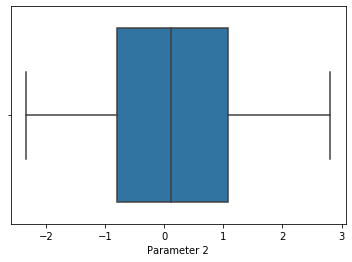

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


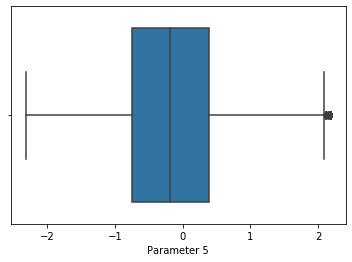

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


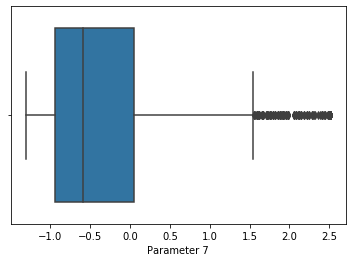

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


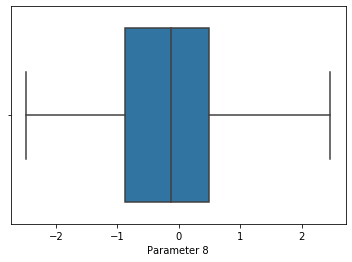

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


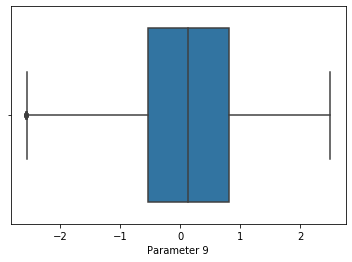

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


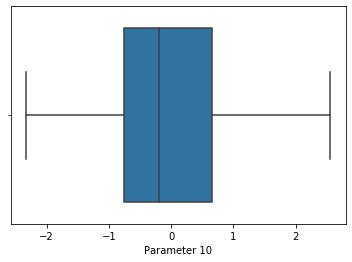

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


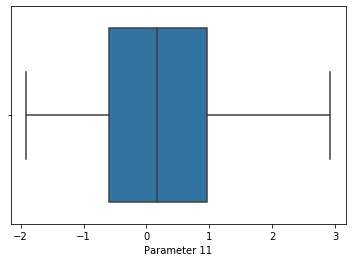

In [992]:
for col in x_adasyn.columns:
    sns.boxplot(x_adasyn[col])
    plt.show()

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


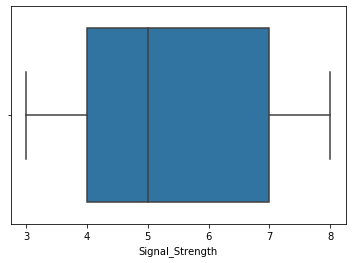

In [976]:
sns.boxplot(y_adasyn)

In [972]:
x_adasyn1=x_adasyn.drop(columns='Parameter 7')

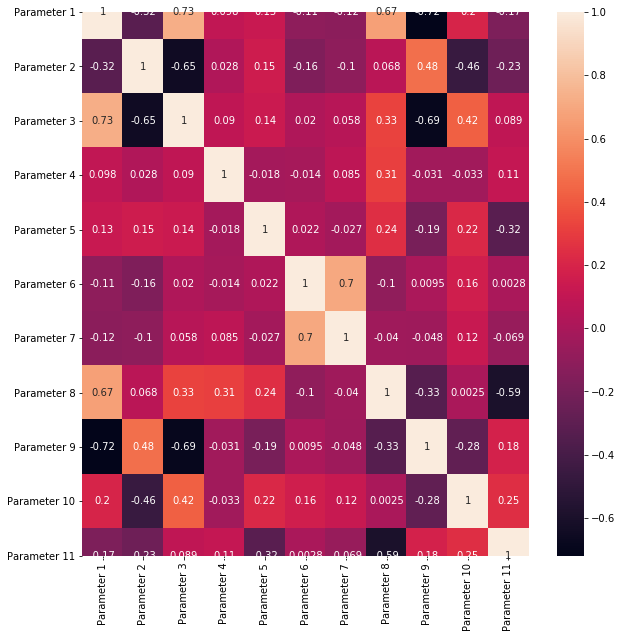

In [745]:
Applying PCA on the resampled data:

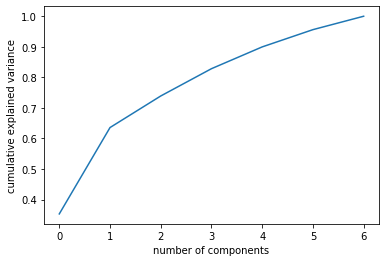

In [995]:
pca = PCA().fit(x_adasyn)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

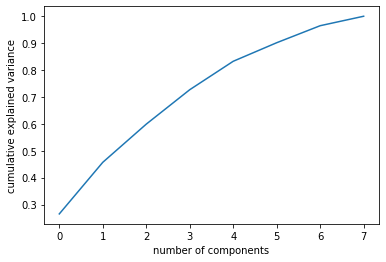

In [520]:
pca = PCA().fit(x_normalized1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [978]:
pca1 = PCA(n_components=6)
pca1.fit(x_adasyn1)
x_pca2 = pca1.transform(x_adasyn1)

In [13]:
pca1 = PCA(n_components=7)
pca1.fit(x_adasyn)
x_pca2 = pca1.transform(x_adasyn)

In [14]:
x_pca3=pd.DataFrame(x_pca2)

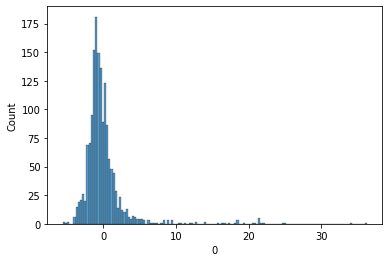

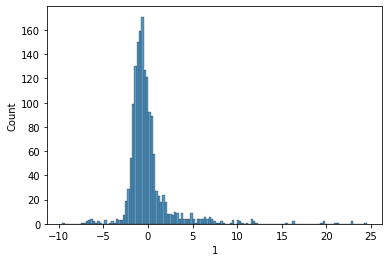

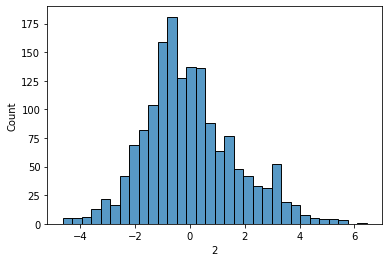

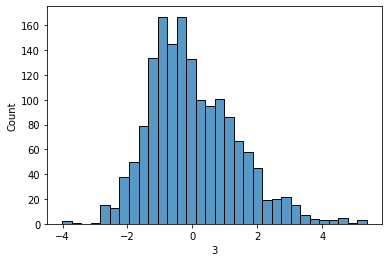

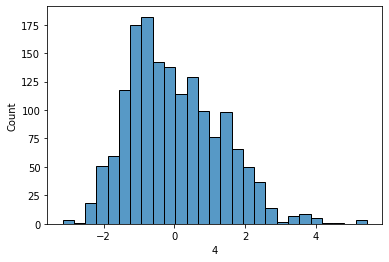

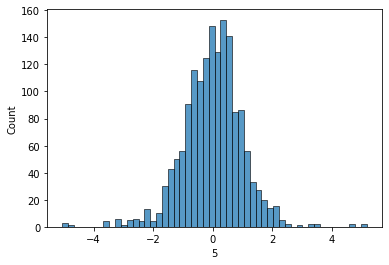

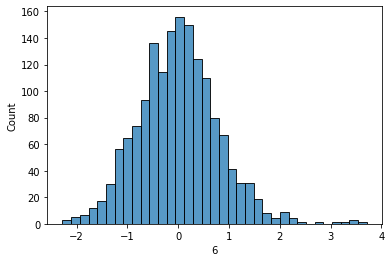

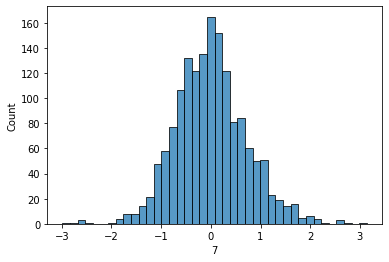

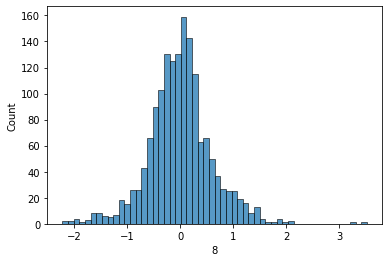

In [648]:
for col in x_pca3.columns:
    sns.histplot(x_pca3[col])
    plt.show()

In [389]:
len(y_adasyn[y_adasyn==8])

690

In [ ]:
Using the resampled data with all 11 features and training the neural network:

In [ ]:
Splitting the data into train and test sets respectively:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_adasyn1, y_adasyn1,random_state=42)

In [22]:
from keras.layers import BatchNormalization, Dropout,Activation

In [ ]:
Designing the neural network:
    In the network below, there is one input layer,1 hidden layer and output layer. The input layer contains 20 neurons, the hidden layer contains 12 neurons while the output contains 1 neuron that generates the output. The activation function used is 'relu' for the input and hidden layers while 'linear' is used in the output layer so that it can deal with positive as well as negative values,

In [20]:
model = Sequential()
model.add(Dense(20, input_dim=11, kernel_initializer='normal'))
#model.add(BatchNormalization())  
model.add(Activation('relu'))  
#model.add(Dropout(0.2))
model.add(Dense(12,kernel_initializer='normal'))
#model.add(BatchNormalization())  
model.add(Activation('relu'))  
#model.add(Dropout(0.2))
#model.add(Dense(8,kernel_initializer='he_normal'))
#model.add(BatchNormalization())  
#model.add(Activation('relu'))  
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                240       
_________________________________________________________________
activation_4 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                252       
_________________________________________________________________
activation_5 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 13        
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
The optimizer used is Adam with a default learning rate of 0.001 and the neural network is trained to minimize the mean squared error in the output.

In [22]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [393]:
history = model.fit(X_train, y_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.2)

Epoch 1/200
486/486 [==============================] - 8s 5ms/step - loss: 19.2792 - mse: 19.2792 - mae: 3.7036 - val_loss: 0.8511 - val_mse: 0.8511 - val_mae: 0.7487
Epoch 2/200
486/486 [==============================] - 1s 2ms/step - loss: 0.8788 - mse: 0.8788 - mae: 0.7488 - val_loss: 0.7157 - val_mse: 0.7157 - val_mae: 0.6843
Epoch 3/200
486/486 [==============================] - 1s 2ms/step - loss: 0.7510 - mse: 0.7510 - mae: 0.6922 - val_loss: 0.6428 - val_mse: 0.6428 - val_mae: 0.6280
Epoch 4/200
486/486 [==============================] - 1s 2ms/step - loss: 0.6922 - mse: 0.6922 - mae: 0.6501 - val_loss: 0.6260 - val_mse: 0.6260 - val_mae: 0.6099
Epoch 5/200
486/486 [==============================] - 1s 2ms/step - loss: 0.6976 - mse: 0.6976 - mae: 0.6523 - val_loss: 0.6394 - val_mse: 0.6394 - val_mae: 0.6391
Epoch 6/200
486/486 [==============================] - 1s 2ms/step - loss: 0.6909 - mse: 0.6909 - mae: 0.6445 - val_loss: 0.5728 - val_mse: 0.5728 - val_mae: 0.5788
Epoch 7/

In [ ]:
Evaluating the model using the test set and obtaining the mse:

In [24]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.4083 - mse: 0.4083 - mae: 0.4458


[0.40825363993644714, 0.40825363993644714, 0.4457792639732361]

In [ ]:
The mse is 0.4083.

In [394]:
y_pred=model.predict(X_test)

In [395]:
type(y_pred)

numpy.ndarray

In [396]:
y_test.values

array([7, 6, 3, ..., 6, 6, 3], dtype=int64)

In [397]:
output=pd.DataFrame(columns=['actual','predicted'])

In [398]:
output['actual']=y_test

In [399]:
output['predicted']=y_pred

In [403]:
output

actual  predicted
3633       7   6.815938
149        6   5.893491
2025       3   3.042057
2505       8   7.861345
3203       4   4.008731
...      ...        ...
3659       7   6.667634
2004       3   2.967520
1506       6   4.762295
910        6   6.363900
2093       3   3.023151

[1011 rows x 2 columns]

In [408]:
classes

[5, 6, 7, 4, 8, 3]

In [ ]:
Using a scatter plot to determine the range of values of predictions for each class:

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


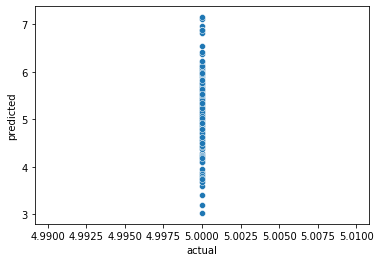

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


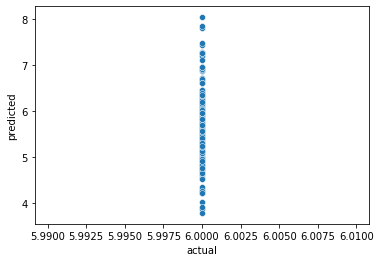

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


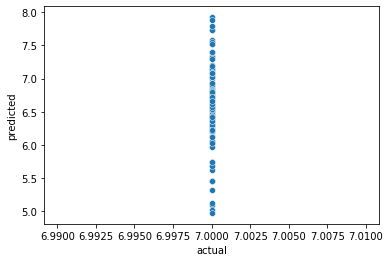

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


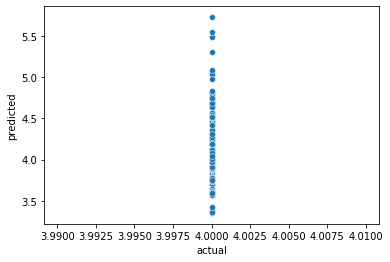

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


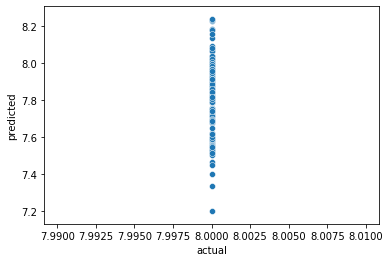

C:\Program Files\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


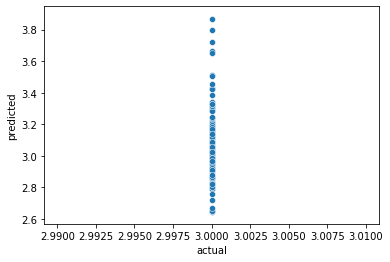

In [409]:
for i in classes:
    sns.scatterplot(output[output['actual']==i]['actual'],output[output['actual']==i]['predicted'])
    plt.show()

In [ ]:
i) For y=5, the predictions lie in the range of 3 to 7 with most of the predictions lying in the range of around 3.8 to 6.2.
ii) For y=6, the predictions lie in the range of 4 to 8 with most of the predictions lying in the range of 4.5 to 6.5.
iii) For y=7 the predictions lie in the range of 5 to 8, with most of them lying between 6 to 7.2.
iv) For y=4, range of predictions is between 3.5 to 5.5.
v) For y=8, the range of predictions is between 7.2 to 8.2.
vi) For y=3, the range of predicts is between 2.6 to 3.8.

In [ ]:
Using the input data after removing irrelevant features and adding batch normalization and dropout to the neural network:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_adasyn, y_adasyn,random_state=42)

In [27]:
model = Sequential()
model.add(Dense(20, input_dim=7, kernel_initializer='normal'))
model.add(BatchNormalization())  
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(12,kernel_initializer='normal'))
model.add(BatchNormalization())  
model.add(Activation('relu'))  
model.add(Dropout(0.2))
#model.add(Dense(8,kernel_initializer='he_normal'))
#model.add(BatchNormalization())  
#model.add(Activation('relu'))  
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 20)                80        
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 12)                252       
_________________________________________________________________
batch_normalization_7 (Batch (None, 12)                48        
_________________________________________________________________
activation_9 (Activation)    (None, 12)               

In [28]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - mse: 0.6663 - mae: 0.6862


[0.6662545800209045, 0.6662545800209045, 0.686194121837616]

In [ ]:
The MSE is found to be higher as compared to the previous neural network with no batch normalization,dropout using input data containing all the features.

In [ ]:
Increasing the number of neurons in input and hidden layer and reducing the batch normalization and dropout layers:

In [32]:
model = Sequential()
model.add(Dense(50, input_dim=7, kernel_initializer='normal'))
model.add(BatchNormalization())  
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(30,kernel_initializer='normal'))
#model.add(BatchNormalization())  
model.add(Activation('relu'))  
#model.add(Dropout(0.2))
#model.add(Dense(8,kernel_initializer='he_normal'))
#model.add(BatchNormalization())  
#model.add(Activation('relu'))  
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                400       
_________________________________________________________________
batch_normalization_9 (Batch (None, 50)                200       
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_14 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

In [33]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.5329 - mse: 0.5329 - mae: 0.5378


[0.5329337120056152, 0.5329337120056152, 0.5378105044364929]

In [ ]:
The mse obtained is found to be lesser than the previous neural network after reducing the number of batch normalization and dropout along with an increase in the number of neurons per layer. 

In [ ]:
Increasing the number of layers:
    An extra hidden layer containing 8 neurons is added.

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=7, kernel_initializer='normal'))
model.add(BatchNormalization())  
model.add(Activation('relu'))  
model.add(Dropout(0.2))
model.add(Dense(30,kernel_initializer='normal'))
#model.add(BatchNormalization())  
model.add(Activation('relu'))  
#model.add(Dropout(0.2))
model.add(Dense(8,kernel_initializer='he_normal'))
#model.add(BatchNormalization())  
model.add(Activation('relu'))  
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=5,  verbose=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                400       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 30)                1530      
_________________________________________________________________
activation_9 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                

In [30]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.5080 - mse: 0.5080 - mae: 0.5236


[0.5080085396766663, 0.5080085396766663, 0.5235869884490967]

In [ ]:
Saving the model for future purpose:

In [ ]:
The mse seems to be less after increasing the number of hidden layers.

In [31]:
model.save('model_regression.hdf5')

In [ ]:
Training the data using neural network classifier:

In [828]:
X_train, X_test, y_train, y_test = train_test_split(x_adasyn, y_adasyn,random_state=42)

In [650]:
x_pca3.shape

(1599, 9)

In [ ]:
Since the given data has only 6 classes and using only one hot encoding converts the target variable to 9 classes from 0 to 8, the ordinal encoder is used before to_categorical so as to obtain only6 target columns instead of 9. 

In [ ]:
Performing ordinal encoding:

In [16]:
oe=OrdinalEncoder()
y2=oe.fit_transform(np.array(y_adasyn).reshape(-1,1))

In [ ]:
Splitting data into train and test data:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_pca3, y2,random_state=42)

In [1000]:
X_train.shape

(3045, 7)

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [942]:
oe=OrdinalEncoder()
y2=oe.fit_transform(np.array(y).reshape(-1,1))

In [947]:
y2.shape

(1599, 1)

In [949]:
y3 = to_categorical(y2)

In [950]:
y3

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
One hot encoding the train and test target variables:

In [19]:
from keras.utils.np_utils import to_categorical

In [20]:
y_train1 = to_categorical(y_train)
y_test1= to_categorical(y_test)

In [1002]:
y_train1.shape

(3045, 6)

In [ ]:
Defining the model:
    The neural network is designed using 1 input layer,4 hidden layers along with dropout for each layer for regularization. The activation used for the hidden layers and input layer is relu while for the output, the softmax activation function is used to predict multiple classes. 

In [ ]:
Obtaining the summary of the model:

In [1020]:
model1 = Sequential()
model1.add(Dense(100, input_dim=7))
#model1.add(BatchNormalization())  
model1.add(Activation('relu'))  
model1.add(Dropout(0.1))
model1.add(Dense(100))
#model1.add(BatchNormalization())  
model1.add(Activation('relu'))  
model1.add(Dropout(0.1))
model1.add(Dense(100))
#model1.add(BatchNormalization())  
model1.add(Activation('relu'))
#model1.add(Dropout(0.1))
model1.add(Dense(100))
#model1.add(BatchNormalization())  
model1.add(Activation('relu'))
model1.add(Dropout(0.1))
model1.add(Dense(100))
#model1.add(BatchNormalization())  
model1.add(Activation('relu'))
model1.add(Dropout(0.1))
model1.add(Dense(6, activation='softmax'))
model1.summary()

Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_557 (Dense)            (None, 100)               800       
_________________________________________________________________
activation_375 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_200 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_558 (Dense)            (None, 100)               10100     
_________________________________________________________________
activation_376 (Activation)  (None, 100)               0         
_________________________________________________________________
dropout_201 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_559 (Dense)            (None, 100)            

In [ ]:
Compiling the model using categorical crossentropy loss and adam optimizer.

In [1021]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [470]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train1),
                                                 y_train1)

C:\Program Files\Python37\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[3 4 5 6 7 8], y=582     5
626     5
1030    7
620     5
490     6
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: Signal_Strength, Length: 1199, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [ ]:
Training the model with 100 epochs and a batch size of 10 with a validation split of 0.1

In [1022]:
history = model1.fit(X_train, y_train1, epochs=100, batch_size=10,  verbose=1, validation_split=0.1,shuffle=True)

Epoch 1/100
274/274 [==============================] - 4s 6ms/step - loss: 1.4452 - accuracy: 0.3832 - val_loss: 0.9377 - val_accuracy: 0.6328
Epoch 2/100
274/274 [==============================] - 1s 3ms/step - loss: 0.9793 - accuracy: 0.6017 - val_loss: 0.7933 - val_accuracy: 0.7016
Epoch 3/100
274/274 [==============================] - 1s 3ms/step - loss: 0.8543 - accuracy: 0.6379 - val_loss: 0.7399 - val_accuracy: 0.6885
Epoch 4/100
274/274 [==============================] - 1s 3ms/step - loss: 0.8040 - accuracy: 0.6737 - val_loss: 0.6644 - val_accuracy: 0.7574
Epoch 5/100
274/274 [==============================] - 1s 3ms/step - loss: 0.7379 - accuracy: 0.7069 - val_loss: 0.6350 - val_accuracy: 0.7410
Epoch 6/100
274/274 [==============================] - 1s 3ms/step - loss: 0.6937 - accuracy: 0.7253 - val_loss: 0.5960 - val_accuracy: 0.7410
Epoch 7/100
274/274 [==============================] - 1s 3ms/step - loss: 0.6529 - accuracy: 0.7369 - val_loss: 0.5550 - val_accuracy: 0.7738

In [ ]:
Training the model with increased number of epochs and batch size:

In [1010]:
history = model1.fit(X_train, y_train1, epochs=200, batch_size=20,  verbose=1)

Epoch 1/200
153/153 [==============================] - 3s 4ms/step - loss: 1.4518 - accuracy: 0.4007
Epoch 2/200
153/153 [==============================] - 1s 3ms/step - loss: 0.9997 - accuracy: 0.5904
Epoch 3/200
153/153 [==============================] - 1s 3ms/step - loss: 0.9192 - accuracy: 0.6175
Epoch 4/200
153/153 [==============================] - 1s 4ms/step - loss: 0.8554 - accuracy: 0.6469
Epoch 5/200
153/153 [==============================] - 1s 3ms/step - loss: 0.7906 - accuracy: 0.6775
Epoch 6/200
153/153 [==============================] - 1s 3ms/step - loss: 0.7427 - accuracy: 0.7020
Epoch 7/200
153/153 [==============================] - 1s 3ms/step - loss: 0.6695 - accuracy: 0.7450
Epoch 8/200
153/153 [==============================] - 1s 3ms/step - loss: 0.6606 - accuracy: 0.7336
Epoch 9/200
153/153 [==============================] - 1s 3ms/step - loss: 0.6321 - accuracy: 0.7409
Epoch 10/200
153/153 [==============================] - 1s 3ms/step - loss: 0.6248 - accura

In [442]:
y_test1.shape

(1011, 9)

In [422]:
y_train1

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [423]:
y_train.unique()

array([8, 3, 6, 5, 7, 4], dtype=int64)

In [424]:
y_train

2576    8
2707    8
2185    3
596     6
2098    3
       ..
1130    6
1294    6
860     5
3507    4
3174    4
Name: Signal_Strength, Length: 3033, dtype: int64

In [ ]:
Obtaining the predictions:

In [438]:
model1.predict(X_test)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0013181e-02,
        9.7998649e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3693492e-01,
        5.7292868e-12, 0.0000000e+00],
       [0.0000000e+00, 1.9135250e-38, 1.8018608e-38, ..., 2.9723689e-05,
        1.4706707e-10, 0.0000000e+00],
       ...,
       [8.3310774e-34, 7.2944420e-32, 5.2416008e-31, ..., 9.3532883e-02,
        4.2814584e-08, 3.6448126e-21],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.4086142e-01,
        2.5342098e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1982568e-12,
        2.5619032e-37, 0.0000000e+00]], dtype=float32)

In [439]:
pd.DataFrame(model1.predict(X_test))

0             1             2             3             4  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  9.530763e-09   
2     0.000000e+00  1.913525e-38  1.801861e-38  9.999567e-01  5.188733e-10   
3     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.552170e-38   
4     0.000000e+00  0.000000e+00  8.104573e-38  9.813671e-25  9.972900e-01   
...            ...           ...           ...           ...           ...   
1006  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.254104e-13   
1007  0.000000e+00  0.000000e+00  0.000000e+00  9.999995e-01  2.806353e-13   
1008  8.331077e-34  7.294442e-32  5.241601e-31  1.642447e-18  9.055499e-01   
1009  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.499776e-03   
1010  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  3.276763e-21   

                 5             6             7             8  
0     3.722288e-07  2.001318e-02  9.799865e-01  0.000000e+00  
1     8.630651e-01  1.369349e-01  5.729287e-12  0.000000e+00  
2     1.363297e-05  2.972369e-05  1.470671e-10  0.000000e+00  
3     1.017229e-10  3.209703e-08  9.980828e-07  9.999989e-01  
4     4.340679e-05  2.666633e-03  3.025361e-17  0.000000e+00  
...            ...           ...           ...           ...  
1006  2.501535e-03  3.694824e-06  9.974948e-01  3.864066e-24  
1007  2.034551e-07  2.948694e-07  1.583949e-13  0.000000e+00  
1008  9.171959e-04  9.353288e-02  4.281458e-08  3.644813e-21  
1009  3.217831e-03  7.408614e-01  2.534210e-01  0.000000e+00  
1010  4.972799e-19  1.198257e-12  2.561903e-37  0.000000e+00  

[1011 rows x 9 columns]

In [440]:
pd.DataFrame(y_test1)

0    1    2    3    4    5    6    7    8
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...
1006  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1007  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1008  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1009  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1010  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[1011 rows x 9 columns]

In [1027]:
results = model1.evaluate(X_test, y_test1,batch_size=10)

102/102 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.8483


In [ ]:
The test set predictions yield an accuracy of 84%

In [16]:
from sklearn.ensemble import RandomForestClassifier

<BarContainer object of 11 artists>

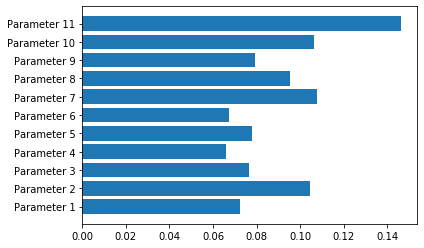

In [17]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_normalized, y)

plt.barh(x_normalized.columns, rf.feature_importances_)

In [923]:
rf.feature_importances_

array([0.07431829, 0.1049949 , 0.07699406, 0.0627744 , 0.07911714,
       0.07088106, 0.10567569, 0.09452019, 0.07714257, 0.11043873,
       0.14314298])

In [ ]:
Hyperparameter tuning of the classifier model in order to find the best hyperparameters:
    The hyperparameters to be tuned below are the weight initializer mode and the optimizer.

In [380]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
Defining the parameter grid:

In [1028]:
learn_rate = [0.001, 0.02, 0.2]
dropout_rate = [0.0, 0.2, 0.4]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [1047]:
param_grid = dict( init_mode=init_mode, optimizer=optimizer )

In [ ]:
Defining the model to be trained for hyperparameter tuning:

In [1048]:
def create_model(init_mode,optimizer):
    model2 = Sequential()
    model2.add(Dense(100, input_dim=7,kernel_initializer=init_mode))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer=init_mode))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer=init_mode))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model1.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer=init_mode))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer=init_mode))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(6, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model2


In [ ]:
Using Keras Classifier to build the estimator for tuning:

In [1049]:
model2 = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
Implementing 3-Fold CV for each hyperparameter combination:

In [1050]:
grid = GridSearchCV(estimator=model2, param_grid=param_grid,
                    cv=KFold(n_splits=3,random_state=42,shuffle=True), verbose=10)
grid_results = grid.fit(X_train, y_train1,batch_size=10,epochs=100)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV 1/3; 1/56] START init_mode=uniform, optimizer=SGD...........................
Model: "sequential_1145"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3332 (Dense)           (None, 100)               800       
_________________________________________________________________
activation_2126 (Activation) (None, 100)               0         
_________________________________________________________________
dropout_1769 (Dropout)       (None, 100)               0         
_________________________________________________________________
dense_3333 (Dense)           (None, 100)               10100     
_________________________________________________________________
activation_2127 (Activation) (None, 100)               0         
_________________________________________________________________
dropout_1770 (Dropout)       (None, 100)

In [ ]:
Obtaining the mean score and deviation of scores for each combination:

In [1051]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.6660098433494568 (0.019655122080470686) with: {'init_mode': 'uniform', 'optimizer': 'SGD'}
0.8292282422383627 (0.009288772041214944) with: {'init_mode': 'uniform', 'optimizer': 'RMSprop'}
0.28111658493677777 (0.09429463195680354) with: {'init_mode': 'uniform', 'optimizer': 'Adagrad'}
0.17044335107008615 (0.017752227383112926) with: {'init_mode': 'uniform', 'optimizer': 'Adadelta'}
0.8397372762362162 (0.0012287667382952865) with: {'init_mode': 'uniform', 'optimizer': 'Adam'}
0.7724137902259827 (0.008398484635997232) with: {'init_mode': 'uniform', 'optimizer': 'Adamax'}
0.8413793245951334 (0.0035064267354321184) with: {'init_mode': 'uniform', 'optimizer': 'Nadam'}
0.8160919348398844 (0.005356154093107798) with: {'init_mode': 'lecun_uniform', 'optimizer': 'SGD'}
0.841707706451416 (0.007603169747457712) with: {'init_mode': 'lecun_uniform', 'optimizer': 'RMSprop'}
0.6469622453053793 (0.006452167242613935) with: {'init_mode': 'lecun_uniform', 'optimizer': 'Adagrad'}
0.41444991032282513 (0.

In [1052]:
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))


Best: 0.8505747119585673, using {'init_mode': 'glorot_normal', 'optimizer': 'Nadam'}


In [ ]:
The best score is obtained using glorot_normal initializer and Nadam optimizer.

In [ ]:
Using the optimal hyperparameters for tuning:

In [23]:
model2 = Sequential()
model2.add(Dense(100, input_dim=7,kernel_initializer='glorot_normal'))
#model1.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.1))
model2.add(Dense(100,kernel_initializer='glorot_normal'))
#model1.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.1))
model2.add(Dense(100,kernel_initializer='glorot_normal'))
#model1.add(BatchNormalization())  
model2.add(Activation('relu'))
#model1.add(Dropout(0.1))
model2.add(Dense(100,kernel_initializer='glorot_normal'))
#model1.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(Dense(100,kernel_initializer='glorot_normal'))
#model1.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(Dense(6, activation='softmax'))
model2.summary()
model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [24]:
history = model2.fit(X_train, y_train1, epochs=100, batch_size=10,  verbose=1)

Epoch 1/100
305/305 [==============================] - 3s 3ms/step - loss: 1.3738 - accuracy: 0.4066
Epoch 2/100
305/305 [==============================] - 1s 3ms/step - loss: 0.9321 - accuracy: 0.6128
Epoch 3/100
305/305 [==============================] - 1s 3ms/step - loss: 0.8076 - accuracy: 0.6780
Epoch 4/100
305/305 [==============================] - 1s 3ms/step - loss: 0.7511 - accuracy: 0.6961
Epoch 5/100
305/305 [==============================] - 1s 3ms/step - loss: 0.7007 - accuracy: 0.7170
Epoch 6/100
305/305 [==============================] - 1s 3ms/step - loss: 0.6570 - accuracy: 0.7269
Epoch 7/100
305/305 [==============================] - 1s 3ms/step - loss: 0.6332 - accuracy: 0.7515
Epoch 8/100
305/305 [==============================] - 1s 3ms/step - loss: 0.5950 - accuracy: 0.7518
Epoch 9/100
305/305 [==============================] - 1s 3ms/step - loss: 0.5864 - accuracy: 0.7709
Epoch 10/100
305/305 [==============================] - 1s 3ms/step - loss: 0.5595 - accura

In [25]:
results = model2.evaluate(X_test, y_test1)

32/32 [==============================] - 0s 2ms/step - loss: 0.7234 - accuracy: 0.8524


In [ ]:
The model yields an accuracy of 85.24% on the train set.

In [ ]:
Saving the model for future use:

In [26]:
model2.save('model_classifier.hdf5')

In [ ]:
Building the GUI to automate the regressor and classifiers:

In [ ]:
Importing the necessary tkinter libraries:

In [51]:
%gui tk
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *

In [ ]:
Defining the main tkinter frame and the different components to be added to this window:
    The GUI consists of the following components:
        i) The main canvas window to display the buttons and entry boxes.
        ii) The following actions are performed in the GUI:
            i) Importing the csv file using import data button.
            ii) Obtaining the target column upon entering the target column name using import target button.
            iii) Preprocessing data and training the regression model using Preprocess Data and Train Regressor button.
            iv)Preprocessing data and training the classification model using Preprocess Data and Train Classifier button.
            v) Saving the regression model using pickle regressor button.
            vi) Saving the classification model using pickle classifier button.
            v) Exiting the gui using root quit button.
            vi) Closing the plots generated after training the classifier and regressor models.

In [97]:
root = tk.Tk()
root.title('Neural Network')
#root.iconbitmap('class.ico')
root.resizable(False, False)
tit = tk.Label(root, text="Neural Network", padx=25, pady=6, font=("", 12)).pack()
canvas = tk.Canvas(root, height=500, width=500, bg='grey')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
custName = tk.StringVar()
fileName = Entry(root, textvariable=custName)
entry1 = tk.Entry (root) 
#fileName.grid(row=0, column=1)
#entry1.grid(row=1, column=1)
canvas.create_window(300, 100, window=fileName,width=400)
canvas.create_window(300, 160, window=entry1)
choose_csv= tk.Button(root, text='Import Data',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=import_data)
#choose_csv.pack(side=tk.LEFT)
canvas.create_window(0, 100, window=choose_csv,width=100)
choose_target= tk.Button(root, text='Import Target',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=import_target)
#choose_target.pack(side=tk.LEFT)
canvas.create_window(0, 160, window=choose_target,width=100)
button = tk.Button(root, text = 'root quit', command=quit)
button.pack(side=tk.RIGHT)

train_csv_reg = tk.Button(root, text='Preprocess Data and Train Regressor',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=train_regression)
train_csv_reg.pack(side=tk.LEFT)
close_csv_regplot = tk.Button(root, text='Close Plot',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=close_plot)
close_csv_regplot.pack(side=tk.LEFT)
pickle_reg = tk.Button(root, text='Pickle Regression Model',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=pickle_regression)
pickle_reg.pack(side=tk.LEFT)
train_csv_class = tk.Button(root, text='Preprocess Data and Train Classifier',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=train_classifier)
train_csv_class.pack(side=tk.LEFT)
pickle_reg = tk.Button(root, text='Pickle Classifier Model',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=pickle_classifier)
pickle_reg.pack(side=tk.LEFT)
root.mainloop()

Done
Found
Parameter 1
7.1 9.2
Parameter 2
0.39 0.64
Parameter 3
0.09 0.42
Parameter 4
1.9 2.6
Parameter 5
0.07 0.09
Parameter 6
7.0 21.0
Parameter 7
22.0 62.0
Parameter 8
0.9956 0.9978349999999999
Parameter 9
3.21 3.4
Parameter 10
0.55 0.73
Parameter 11
9.5 11.1
7
4
8
3
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 100)               800       
_________________________________________________________________
activation_48 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_49 (Activation)   (None, 100)     

In [ ]:
Defining the functions for each button:

In [ ]:
i) Function for close plot button

In [96]:
def close_plot():
    global chart_type
    global chart_type1
    canvas.delete(canvas.create_window(100, 300, window=chart_type.get_tk_widget()))
    canvas.delete(canvas.create_window(300, 300, window=chart_type1.get_tk_widget()))

In [ ]:
ii) Function for exiting the gui using root quit button

In [4]:
def quit():
    root.quit() 
    root.destroy()

In [ ]:
Function for importing data using import data button:

In [27]:
def import_data():
    global df
    import_file_path = filedialog.askopenfilename()
    df = pd.read_csv (import_file_path)
    label = tk.Label(root, text= "Done")
    label.pack()
    custName.set(import_file_path)
    fileName.delete(0, "end")
    fileName.insert(0, import_file_path)
    #fileName.insert(import_file_path)
    print ('Done')
    


In [ ]:
Function for saving the target column values for training using import target button:

In [6]:
def import_target():
    global df
    global target_column
    col=entry1.get()
    if col in df.columns:
        label1 = tk.Label(root, text= "Found")
        label1.pack()
        print('Found')
        target_column=df[col]
    

In [ ]:
Function for training the regressor model using preprocess data and train regression model button:

In [7]:
def train_regression():
    global df
    global target_column
    global reg_model
    x_adasyn,y_adasyn=data_preprocess(df,target_column)
    reg_model=train_regmodel(x_adasyn,y_adasyn)

In [ ]:
Function for preprocessing the data:

In [8]:
def data_preprocess(df1,target_column1):
    global df
    global target_column
    x=df.drop(columns='Signal_Strength')
    y=target_column
    for col in x.describe().columns:
        print(col)
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        val1=(Q1 - 1.5 * IQR)
        val2=(Q3 + 1.5 * IQR)
        print(Q1,Q3)
        x.loc[x[col]<(Q1 - 1.5 * IQR),col]=val1
        x.loc[x[col]>(Q3 + 1.5 * IQR),col]=val2
    x_norm=x.apply(zscore)
    x_norm1=x_norm.drop(columns=['Parameter 4','Parameter 6','Parameter 1','Parameter 3'])
    from imblearn.over_sampling import ADASYN
    # create the object to resample theminority majority class.
    adasyn = ADASYN(sampling_strategy='minority',n_neighbors=3)
    x_adasyn = x_norm1
    y_adasyn = y
    classes=y.unique().tolist()
    for cl in classes[2:]:
        print(cl)
    # fit the object to the training data.
        x_adasyn, y_adasyn = adasyn.fit_resample(x_adasyn, y_adasyn)
    return x_adasyn,y_adasyn
    

In [ ]:
Function for training model using preprocessed data and generating the model training graph as well:

In [87]:
def train_regmodel(x_adasyn,y_adasyn):
    global chart_type
    X_train, X_test, y_train, y_test = train_test_split(x_adasyn, y_adasyn,random_state=42)
    model = Sequential()
    model.add(Dense(20, input_dim=7, kernel_initializer='normal'))
    #model.add(BatchNormalization())  
    model.add(Activation('relu'))  
    #model.add(Dropout(0.2))
    model.add(Dense(12,kernel_initializer='normal'))
    #model.add(BatchNormalization())  
    model.add(Activation('relu'))  
    #model.add(Dropout(0.2))
    #model.add(Dense(8,kernel_initializer='he_normal'))
    #model.add(BatchNormalization())  
    #model.add(Activation('relu'))  
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=5,  verbose=1, validation_split=0.2)
    results = model.evaluate(X_test, y_test)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    label_reg = tk.Label(root, text= "Trained and Evaluated Regressor")
    label_reg.pack()
    figure = plt.Figure(figsize=(3,2), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, root)
    #chart_type.draw()
    #chart_type.get_tk_widget().pack()
    canvas.create_window(100, 300, window=chart_type.get_tk_widget())
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()
    ax.set_title('Epochs vs. Training and Validation Loss-Regression',fontsize=8) 
    #ax.set_title('The Title for your chart')
    return model

In [10]:
import pickle

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from keras.utils.np_utils import to_categorical

In [ ]:
Function to save regression model using pickle regressor button:

In [12]:
def pickle_regression():
    global reg_model
    filename = filedialog.asksaveasfilename( defaultextension=".hdf5",filetypes=[("default", "*.hdf5"),
                           ("all", "*.*")])
    print(filename)
    reg_model.save(filename)
    label_picklereg = tk.Label(root, text= "Saved Regressor Model to Disk")
    label_picklereg.pack()
    

In [ ]:
Function to preprocess data and train classifier model:

In [95]:
def train_classifier_model(x_adasyn,y_adasyn):
    global chart_type1
    pca1 = PCA(n_components=7)
    pca1.fit(x_adasyn)
    x_pca2 = pca1.transform(x_adasyn)
    x_pca3=pd.DataFrame(x_adasyn)
    oe=OrdinalEncoder()
    y2=oe.fit_transform(np.array(y_adasyn).reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(x_pca3, y2,random_state=42)
    y_train1 = to_categorical(y_train)
    y_test1= to_categorical(y_test)
    model2 = Sequential()
    model2.add(Dense(100, input_dim=7,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model1.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(6, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    history = model2.fit(X_train, y_train1, epochs=100, batch_size=10,  verbose=1,validation_split=0.2)
    results = model2.evaluate(X_test, y_test1)
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    label_class = tk.Label(root, text= "Trained and Evaluated  Classifier")
    label_class.pack()
    figure = plt.Figure(figsize=(3,2), dpi=100)
    ax = figure.add_subplot(111)
    chart_type1 = FigureCanvasTkAgg(figure, root)
    #chart_type.draw()
    #chart_type.get_tk_widget().pack()
    canvas.create_window(500, 300, window=chart_type1.get_tk_widget())
    ax.plot(train_accuracy, label='Training Accuracy')
    ax.plot(val_accuracy, label='Validation Accuracy')
    ax.legend()
    ax.set_title('Epochs vs. Training and Validation Accuracy-Classifier',fontsize=6) 
    #ax.set_title('The Title for your chart')
    return model2

In [14]:
def train_classifier():
    global df
    global target_column
    global classifier_model
    x_adasyn,y_adasyn=data_preprocess(df,target_column)
    classifier_model=train_classifier_model(x_adasyn,y_adasyn)

In [ ]:
Function to save classification model using pickle classifier button:

In [15]:
def pickle_classifier():
    global classifier_model
    filename = filedialog.asksaveasfilename( defaultextension=".hdf5",filetypes=[("default", "*.hdf5"),
                           ("all", "*.*")])
    print(filename)
    classifier_model.save(filename)
    label_pickleclass = tk.Label(root, text= "Saved Classifier Model to Disk")
    label_pickleclass.pack()

# Entire GUI: Kindly do run this to see the implementation


In [35]:
%gui tk
import tkinter as tk
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.layers import BatchNormalization, Dropout,Activation
import matplotlib.pyplot as plt

def close_plot():
    global chart_type
    global chart_type1
    canvas.delete(canvas.create_window(100, 300, window=chart_type.get_tk_widget()))
    canvas.delete(canvas.create_window(300, 300, window=chart_type1.get_tk_widget()))

def quit():
    root.quit() 
    root.destroy()

def import_data():
    global df
    import_file_path = filedialog.askopenfilename()
    df = pd.read_csv (import_file_path)
    label = tk.Label(root, text= "Done")
    label.pack()
    custName.set(import_file_path)
    fileName.delete(0, "end")
    fileName.insert(0, import_file_path)
    #fileName.insert(import_file_path)
    print ('Done')

def import_target():
    global df
    global target_column
    col=entry1.get()
    if col in df.columns:
        label1 = tk.Label(root, text= "Found")
        label1.pack()
        print('Found')
        target_column=df[col]

def train_regression():
    global df
    global target_column
    global reg_model
    x_adasyn,y_adasyn=data_preprocess(df,target_column)
    reg_model=train_regmodel(x_adasyn,y_adasyn)

def data_preprocess(df1,target_column1):
    global df
    global target_column
    x=df.drop(columns='Signal_Strength')
    y=target_column
    for col in x.describe().columns:
        print(col)
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        val1=(Q1 - 1.5 * IQR)
        val2=(Q3 + 1.5 * IQR)
        print(Q1,Q3)
        x.loc[x[col]<(Q1 - 1.5 * IQR),col]=val1
        x.loc[x[col]>(Q3 + 1.5 * IQR),col]=val2
    x_norm=x.apply(zscore)
    x_norm1=x_norm.drop(columns=['Parameter 4','Parameter 6','Parameter 1','Parameter 3'])
    from imblearn.over_sampling import ADASYN
    # create the object to resample theminority majority class.
    adasyn = ADASYN(sampling_strategy='minority',n_neighbors=3)
    x_adasyn = x_norm1
    y_adasyn = y
    classes=y.unique().tolist()
    for cl in classes[2:]:
        print(cl)
    # fit the object to the training data.
        x_adasyn, y_adasyn = adasyn.fit_resample(x_adasyn, y_adasyn)
    return x_adasyn,y_adasyn

def train_regmodel(x_adasyn,y_adasyn):
    global chart_type
    X_train, X_test, y_train, y_test = train_test_split(x_adasyn, y_adasyn,random_state=42)
    model = Sequential()
    model.add(Dense(20, input_dim=7, kernel_initializer='normal'))
    #model.add(BatchNormalization())  
    model.add(Activation('relu'))  
    #model.add(Dropout(0.2))
    model.add(Dense(12,kernel_initializer='normal'))
    #model.add(BatchNormalization())  
    model.add(Activation('relu'))  
    #model.add(Dropout(0.2))
    #model.add(Dense(8,kernel_initializer='he_normal'))
    #model.add(BatchNormalization())  
    #model.add(Activation('relu'))  
    model.add(Dense(1, activation='linear'))
    model.summary()
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=5,  verbose=1, validation_split=0.2)
    results = model.evaluate(X_test, y_test)
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    label_reg = tk.Label(root, text= "Trained and Evaluated Regressor")
    label_reg.pack()
    figure = plt.Figure(figsize=(3,2), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, root)
    #chart_type.draw()
    #chart_type.get_tk_widget().pack()
    canvas.create_window(100, 300, window=chart_type.get_tk_widget())
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()
    ax.set_title('Epochs vs. Training and Validation Loss-Regression',fontsize=8) 
    #ax.set_title('The Title for your chart')
    return model

def pickle_regression():
    global reg_model
    filename = filedialog.asksaveasfilename( defaultextension=".hdf5",filetypes=[("default", "*.hdf5"),
                           ("all", "*.*")])
    print(filename)
    reg_model.save(filename)
    label_picklereg = tk.Label(root, text= "Saved Regressor Model to Disk")
    label_picklereg.pack()

def train_classifier_model(x_adasyn,y_adasyn):
    global chart_type1
    pca1 = PCA(n_components=7)
    pca1.fit(x_adasyn)
    x_pca2 = pca1.transform(x_adasyn)
    x_pca3=pd.DataFrame(x_adasyn)
    oe=OrdinalEncoder()
    y2=oe.fit_transform(np.array(y_adasyn).reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(x_pca3, y2,random_state=42)
    y_train1 = to_categorical(y_train)
    y_test1= to_categorical(y_test)
    model2 = Sequential()
    model2.add(Dense(100, input_dim=7,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model1.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(100,kernel_initializer='glorot_normal'))
    #model1.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(6, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
    history = model2.fit(X_train, y_train1, epochs=100, batch_size=10,  verbose=1)
    results = model2.evaluate(X_test, y_test1)
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    label_class = tk.Label(root, text= "Trained and Evaluated  Classifier")
    label_class.pack()
    figure = plt.Figure(figsize=(3,2), dpi=100)
    ax = figure.add_subplot(111)
    chart_type1 = FigureCanvasTkAgg(figure, root)
    #chart_type.draw()
    #chart_type.get_tk_widget().pack()
    canvas.create_window(500, 300, window=chart_type1.get_tk_widget())
    ax.plot(train_accuracy, label='Training Accuracy')
    ax.plot(val_accuracy, label='Validation Accuracy')
    ax.legend()
    ax.set_title('Epochs vs. Training and Validation Accuracy-Classifier',fontsize=6) 
    #ax.set_title('The Title for your chart')
    return model2

def train_classifier():
    global df
    global target_column
    global classifier_model
    x_adasyn,y_adasyn=data_preprocess(df,target_column)
    classifier_model=train_classifier_model(x_adasyn,y_adasyn)

def pickle_classifier():
    global classifier_model
    filename = filedialog.asksaveasfilename( defaultextension=".hdf5",filetypes=[("default", "*.hdf5"),
                           ("all", "*.*")])
    print(filename)
    classifier_model.save(filename)
    label_pickleclass = tk.Label(root, text= "Saved Classifier Model to Disk")
    label_pickleclass.pack()

root = tk.Tk()
root.title('Neural Network')
#root.iconbitmap('class.ico')
root.resizable(False, False)
tit = tk.Label(root, text="Neural Network", padx=25, pady=6, font=("", 12)).pack()
canvas = tk.Canvas(root, height=500, width=500, bg='grey')
canvas.pack()
frame = tk.Frame(root, bg='white')
frame.place(relwidth=0.8, relheight=0.8, relx=0.1, rely=0.1)
custName = tk.StringVar()
fileName = Entry(root, textvariable=custName)
entry1 = tk.Entry (root) 
#fileName.grid(row=0, column=1)
#entry1.grid(row=1, column=1)
canvas.create_window(300, 100, window=fileName,width=400)
canvas.create_window(300, 160, window=entry1)
choose_csv= tk.Button(root, text='Import Data',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=import_data)
#choose_csv.pack(side=tk.LEFT)
canvas.create_window(0, 100, window=choose_csv,width=100)
choose_target= tk.Button(root, text='Import Target',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=import_target)
#choose_target.pack(side=tk.LEFT)
canvas.create_window(0, 160, window=choose_target,width=100)
button = tk.Button(root, text = 'root quit', command=quit)
button.pack(side=tk.RIGHT)

train_csv_reg = tk.Button(root, text='Preprocess Data and Train Regressor',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=train_regression)
train_csv_reg.pack(side=tk.LEFT)
pickle_reg = tk.Button(root, text='Pickle Regression Model',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=pickle_regression)
pickle_reg.pack(side=tk.LEFT)
train_csv_class = tk.Button(root, text='Preprocess Data and Train Classifier',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=train_classifier)
train_csv_class.pack(side=tk.LEFT)
pickle_reg = tk.Button(root, text='Pickle Classifier Model',
                        padx=35, pady=10,
                        fg="white", bg="grey", command=pickle_classifier)
pickle_reg.pack(side=tk.LEFT)
root.mainloop()


In [ ]:
Part 4: Developing an OCR classifier for the SVHN Dataset:
        

In [36]:
import h5py

In [ ]:
i) Reading the h5py dataset:

In [37]:
dataset1 = h5py.File(r'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [ ]:
Storing the input and output train,validation and test sets in different variables:

In [38]:
x_train = dataset1['X_train']
x_val = dataset1['X_val']
x_test = dataset1['X_test']
y_train = dataset1['y_train']
y_val = dataset1['y_val']
y_test = dataset1['y_test']

In [ ]:
Obtaining the shape of training,validation and test samples:

In [39]:
print(x_train,x_val,x_test)

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4"> <HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4"> <HDF5 dataset "X_test": shape (18000, 32, 32), type "<f4">


In [ ]:
There are 42,000 training samples,60000 training samples and 18000 test samples respectively. The shape of each input is 32*32.

In [378]:
y_train[0]

2

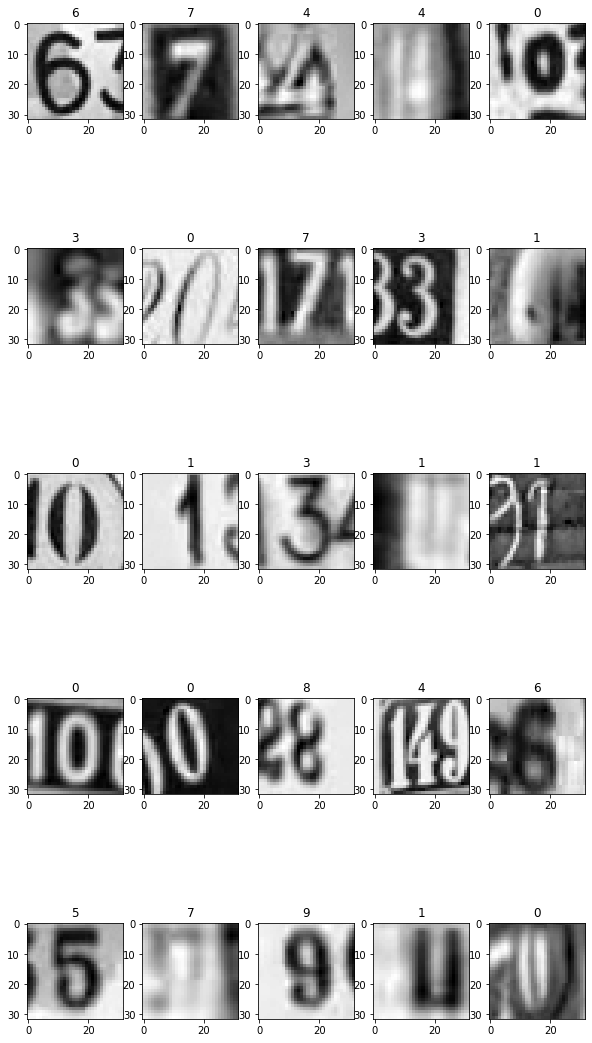

In [40]:
fig=plt.figure(figsize=(10,20))
columns=5
rows=5
for i in range(1, columns*rows+1):
    img=x_train[i]
    ax=fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    ax.set_title(y_train[i])
plt.show()

In [ ]:
From the above images, it can be seen that there are many blurry images with a lot of noise which are a bit difficult to decipher even with normal observation.

In [ ]:
Printing the minimum and maximum values of the training samples:

In [46]:
print('Min: {}, Max: {}'.format(np.array(x_train).min(), np.array(x_train).max()))

Min: 0.0, Max: 254.97450256347656


In [ ]:
Thus the samples need to be normalized in the range of 0-1 for better training.

In [ ]:
Converting the train,test and val inputs to numerical arrays for normalization.

In [51]:
x_train1=np.array(x_train)
x_test1=np.array(x_test)


In [71]:
x_val1=np.array(x_val)

In [52]:
x_train1=x_train1/255.0
x_test1=x_test1/255.0

In [72]:
x_val1-x_val1/255.0

array([[[ 44.12528 ,  45.819508,  51.129303, ...,  25.177277,
          27.407097,  27.049505],
        [ 48.942413,  60.071598,  69.84721 , ...,  23.607258,
          25.138828,  24.196537],
        [ 60.521225,  83.38581 , 101.79533 , ...,  24.408304,
          24.873274,  22.761587],
        ...,
        [ 66.84403 ,  92.88073 , 108.77345 , ...,  26.539911,
          24.505024,  22.870657],
        [ 24.659815,  36.49801 ,  48.71531 , ...,  21.840813,
          21.446465,  21.463398],
        [ 22.569544,  22.683096,  27.159672, ...,  21.358912,
          20.737455,  20.002449]],

       [[ 65.9145  ,  66.01729 ,  67.30024 , ...,  62.906834,
          81.354805, 103.201996],
        [ 69.568504,  67.45224 ,  66.08791 , ...,  55.680187,
          69.61941 ,  93.05803 ],
        [ 67.582825,  67.38789 ,  66.02357 , ...,  57.11962 ,
          70.07362 ,  92.40271 ],
        ...,
        [ 70.52166 ,  64.50733 ,  62.406307, ...,  70.75494 ,
          94.49746 , 113.85555 ],
        [ 68

In [58]:
x_train1.shape[0]

42000

In [ ]:
Implementing one hot encoding of output values:

In [135]:
from keras.utils.np_utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [136]:
y_val1=to_categorical(y_val)

In [55]:
test_labels

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [59]:
x_train2 =x_train1.reshape(x_train1.shape[0],x_train1.shape[1]*x_train1.shape[2])
x_test2 = x_test1.reshape(x_test1.shape[0],x_test1.shape[1]*x_test1.shape[2])
#X_val = np.asarray(X_val).reshape(60000,1024)

In [74]:
x_val2 = x_val1.reshape(x_val1.shape[0],x_val1.shape[1]*x_val1.shape[2])

In [77]:
x_val2.shape

(60000, 1024)

In [68]:
test_labels.shape

(18000, 10)

In [149]:
x_train3 =np.array(x_train).reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).astype('float32')/255.0
x_val3 =np.array(x_val).reshape(x_val.shape[0],x_val.shape[1]*x_val.shape[2]).astype('float32')/255.0

x_test3=np.array(x_test).reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]).astype('float32')/255.0

In [95]:
model3=Sequential()
# Input Layer
#Adding Input layer and activation functions ReLU
model3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
#Adding Activation function
model3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model3.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
model3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model3.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
model3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model3.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
model3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model3.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
model3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_33 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_35 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)               

In [92]:
from keras import optimizers

In [96]:
optimizer=optimizers.Adam(lr=1e-2)

In [97]:
model3.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [98]:
history = model3.fit(x_train2, train_labels, validation_data=(x_val2,val_labels),batch_size = 200, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
210/210 [==============================] - 13s 56ms/step - loss: 3.4603 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/100
 17/210 [=>............................] - ETA: 7s - loss: 2.3032 - accuracy: 0.0836

KeyboardInterrupt: 

In [ ]:
Defining the neural network:
    The given neural network has one input layer consisting of 512 neurons,and 4 hidden layers consisting of 256,128,64,32 neurons respectively. Batch Normalization and Dropout(0.2) layers are added for every layer. The activation functions used are relu and softmax while 'he_normal' initializer is used for weights.

In [148]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(128,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()



Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_70 (Batc (None, 512)               2048      
_________________________________________________________________
activation_114 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_135 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_71 (Batc (None, 256)               1024      
_________________________________________________________________
activation_115 (Activation)  (None, 256)             

In [ ]:
The inputs are reshaped into vectors of length (32*32=1024,1) and normalized before passing on to the neural networks

In [149]:
x_train3 =np.array(x_train).reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]).astype('float32')/255.0
x_val3 =np.array(x_val).reshape(x_val.shape[0],x_val.shape[1]*x_val.shape[2]).astype('float32')/255.0

x_test3=np.array(x_test).reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]).astype('float32')/255.0

In [ ]:
The adam optimizer is used with 1e-4 learning rate. The loss used is categorical crossentropy.

In [150]:
optimizer=optimizers.Adam(lr=1e-4,amsgrad=True)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [151]:
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 200, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
210/210 [==============================] - 32s 68ms/step - loss: 2.6033 - accuracy: 0.1068 - val_loss: 2.2679 - val_accuracy: 0.1534
Epoch 2/100
210/210 [==============================] - 14s 68ms/step - loss: 2.3616 - accuracy: 0.1487 - val_loss: 2.0639 - val_accuracy: 0.2649
Epoch 3/100
210/210 [==============================] - 14s 69ms/step - loss: 2.1676 - accuracy: 0.2108 - val_loss: 1.9072 - val_accuracy: 0.3765
Epoch 4/100
210/210 [==============================] - 15s 71ms/step - loss: 2.0087 - accuracy: 0.2821 - val_loss: 1.7648 - val_accuracy: 0.4714
Epoch 5/100
210/210 [==============================] - 15s 71ms/step - loss: 1.8506 - accuracy: 0.3587 - val_loss: 1.5525 - val_accuracy: 0.5684
Epoch 6/100
210/210 [==============================] - 14s 68ms/step - loss: 1.7023 - accuracy: 0.4262 - val_loss: 1.4505 - val_accuracy: 0.6066
Epoch 7/100
210/210 [==============================] - 14s 67ms/step - loss: 1.5899 - accuracy: 0.4739 - val_loss: 1.3733 - val_ac

In [158]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 4s 6ms/step - loss: 0.5490 - accuracy: 0.8299


[0.548975944519043, 0.8299444317817688]

In [ ]:
A test accuracy of 82.99% is obtained.

In [160]:
y_pred=model2.predict(x_test3)

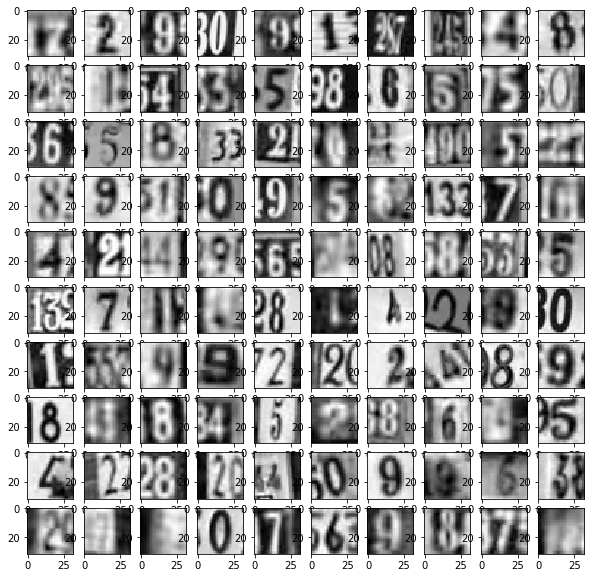

In [162]:
fig=plt.figure(figsize=(10,10))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=x_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    ax.set_title(y_test1[i].argmax(axis=0).astype(str)+','+y_pred[i].argmax(axis=0).astype(str)
plt.show()

In [ ]:
Displaying the predictions and the actual test values:

In [166]:
y_pred

array([[5.8446221e-02, 4.6580918e-02, 1.9347304e-01, ..., 3.1289961e-02,
        6.0862400e-02, 5.6130245e-02],
       [2.9463682e-04, 2.7978937e-03, 1.7750422e-02, ..., 9.7687632e-01,
        1.1687396e-04, 8.2799303e-04],
       [2.2256183e-05, 7.4796306e-05, 9.9740738e-01, ..., 5.8643922e-04,
        2.7544130e-04, 3.5721678e-04],
       ...,
       [7.1072463e-05, 1.2512137e-03, 7.6650555e-04, ..., 9.9747473e-01,
        1.0598258e-05, 1.4033256e-04],
       [1.6296672e-02, 2.0691939e-03, 6.8720123e-03, ..., 4.5451499e-03,
        2.0454256e-02, 9.2197418e-01],
       [1.8217555e-05, 1.3247014e-04, 9.9681336e-01, ..., 1.1223784e-03,
        2.3277810e-04, 2.2314838e-04]], dtype=float32)

In [164]:
y_test1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
GridSearch CV Implementation to find the optimal optimizer:

In [384]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer )

In [390]:
def create_model(optimizer):
    model2 = Sequential()
    model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    #model2.add(Dropout(0.2))
    model2.add(Dense(256,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))  
    #model2.add(Dropout(0.2))
    model2.add(Dense(128,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model2.add(Dropout(0.2))
    model2.add(Dense(64,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model2.add(Dropout(0.2))
    model2.add(Dense(32,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model2.add(Dropout(0.2))
    model2.add(Dense(10, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model2

In [391]:
model_gridsearch = KerasClassifier(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid,
                    cv=KFold(n_splits=3,random_state=42,shuffle=True), verbose=1)
grid_results = grid.fit(x_train3, y_train1,batch_size=400,epochs=50)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Model: "sequential_196"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1063 (Dense)           (None, 512)               524800    
_________________________________________________________________
activation_863 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_1064 (Dense)           (None, 256)               131328    
_________________________________________________________________
activation_864 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_1065 (Dense)           (None, 128)               32896     
_________________________________________________________________
activation_865 (Activation)  (None, 128)               0         
__________________________________________________________

In [ ]:
Printing the results obtained:

In [392]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

0.664476195971171 (0.0060834215435345874) with: {'optimizer': 'SGD'}
0.5209999904036522 (0.300170390111079) with: {'optimizer': 'RMSprop'}
0.3905238111813863 (0.010494951551139496) with: {'optimizer': 'Adagrad'}
0.19123809536298117 (0.008924726508195828) with: {'optimizer': 'Adadelta'}
0.5654285723964373 (0.3339967654553104) with: {'optimizer': 'Adam'}
0.7860714197158813 (0.007562879572910793) with: {'optimizer': 'Adamax'}
0.09571428845326106 (0.0018266733275619051) with: {'optimizer': 'Nadam'}


In [ ]:
It is seen that Adam and Adamax optimizers yield the best scores.

In [393]:
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.7860714197158813, using {'optimizer': 'Adamax'}


In [168]:
from tensorflow.keras import regularizers

In [ ]:
i) Using Adamax optimizer:

In [397]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(128,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(64,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(32,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_219"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1201 (Dense)           (None, 512)               524800    
_________________________________________________________________
activation_978 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_1202 (Dense)           (None, 256)               131328    
_________________________________________________________________
activation_979 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_1203 (Dense)           (None, 128)               32896     
_________________________________________________________________
activation_980 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_1204 (Dense)           (None, 64)             

In [395]:
optimizer=optimizers.Adamax(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 200, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
210/210 [==============================] - 21s 94ms/step - loss: 2.3025 - accuracy: 0.1174 - val_loss: 2.2271 - val_accuracy: 0.2061
Epoch 2/100
210/210 [==============================] - 12s 57ms/step - loss: 2.1924 - accuracy: 0.2225 - val_loss: 2.0922 - val_accuracy: 0.2774
Epoch 3/100
210/210 [==============================] - 12s 57ms/step - loss: 2.0580 - accuracy: 0.2892 - val_loss: 1.9510 - val_accuracy: 0.3624
Epoch 4/100
210/210 [==============================] - 12s 56ms/step - loss: 1.9129 - accuracy: 0.3804 - val_loss: 1.8097 - val_accuracy: 0.4570
Epoch 5/100
210/210 [==============================] - 12s 56ms/step - loss: 1.7784 - accuracy: 0.4556 - val_loss: 1.6961 - val_accuracy: 0.4875
Epoch 6/100
210/210 [==============================] - 12s 55ms/step - loss: 1.6678 - accuracy: 0.5031 - val_loss: 1.5884 - val_accuracy: 0.5377
Epoch 7/100
210/210 [==============================] - 12s 55ms/step - loss: 1.5740 - accuracy: 0.5286 - val_loss: 1.5099 - val_ac

In [396]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 6s 11ms/step - loss: 0.7126 - accuracy: 0.7939


[0.7125572562217712, 0.7939444184303284]

In [ ]:
A test accuracy of 79.39% is obtained. 
Using adam optimizer to train the neural network in order to compare both the optimizers:

In [399]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 200, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
210/210 [==============================] - 13s 57ms/step - loss: 2.2085 - accuracy: 0.2205 - val_loss: 1.9196 - val_accuracy: 0.4033
Epoch 2/100
210/210 [==============================] - 13s 64ms/step - loss: 1.8268 - accuracy: 0.4323 - val_loss: 1.5467 - val_accuracy: 0.5398
Epoch 3/100
210/210 [==============================] - 13s 64ms/step - loss: 1.4835 - accuracy: 0.5513 - val_loss: 1.3825 - val_accuracy: 0.5733
Epoch 4/100
210/210 [==============================] - 12s 59ms/step - loss: 1.3142 - accuracy: 0.6029 - val_loss: 1.2306 - val_accuracy: 0.6253
Epoch 5/100
210/210 [==============================] - 12s 59ms/step - loss: 1.2179 - accuracy: 0.6294 - val_loss: 1.1578 - val_accuracy: 0.6489
Epoch 6/100
210/210 [==============================] - 13s 61ms/step - loss: 1.1555 - accuracy: 0.6490 - val_loss: 1.0965 - val_accuracy: 0.6686
Epoch 7/100
210/210 [==============================] - 14s 67ms/step - loss: 1.0943 - accuracy: 0.6693 - val_loss: 1.0828 - val_ac

In [400]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 6s 6ms/step - loss: 0.6447 - accuracy: 0.8332


[0.6446589827537537, 0.8331666588783264]

In [ ]:
The adam optimizer yields a better accuracy for the same number of epochs. Thus the following neural networks will be trained and refined using adam optimizer:

In [ ]:
Analyzing neural network performance after the removal of batch normalization and dropout layers:

In [309]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(128,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(64,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(32,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_467 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_374 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_468 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_375 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_469 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_376 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_470 (Dense)            (None, 64)              

In [310]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 400, epochs = 150, verbose = 1,shuffle=True)

Epoch 1/150
105/105 [==============================] - 15s 116ms/step - loss: 2.2960 - accuracy: 0.1271 - val_loss: 2.1911 - val_accuracy: 0.2420
Epoch 2/150
105/105 [==============================] - 10s 95ms/step - loss: 2.1281 - accuracy: 0.2824 - val_loss: 1.9235 - val_accuracy: 0.3881
Epoch 3/150
105/105 [==============================] - 10s 95ms/step - loss: 1.8336 - accuracy: 0.4247 - val_loss: 1.6353 - val_accuracy: 0.5010
Epoch 4/150
105/105 [==============================] - 10s 97ms/step - loss: 1.5703 - accuracy: 0.5283 - val_loss: 1.4559 - val_accuracy: 0.5488
Epoch 5/150
105/105 [==============================] - 11s 102ms/step - loss: 1.4131 - accuracy: 0.5732 - val_loss: 1.3300 - val_accuracy: 0.5983
Epoch 6/150
105/105 [==============================] - 10s 94ms/step - loss: 1.3105 - accuracy: 0.6063 - val_loss: 1.2546 - val_accuracy: 0.6145
Epoch 7/150
105/105 [==============================] - 10s 98ms/step - loss: 1.2297 - accuracy: 0.6302 - val_loss: 1.1732 - val_

In [ ]:
The training and validation accuracies are found to be more than 90%. The performance is evaluated on the test set.

In [311]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 4s 6ms/step - loss: 0.6641 - accuracy: 0.8344


[0.6641232967376709, 0.8343889117240906]

In [ ]:
The test set accuracy is found to be 83.43%

In [ ]:
Adding batch normalization and dropout along with l2 regularization for the output layer. Here the lambda value is set as 1e-5.

In [169]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(128,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,kernel_initializer='he_normal'))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))
model2.summary()


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_80 (Batc (None, 512)               2048      
_________________________________________________________________
activation_124 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_81 (Batc (None, 256)               1024      
_________________________________________________________________
activation_125 (Activation)  (None, 256)             

In [170]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [171]:
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 200, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
210/210 [==============================] - 128s 544ms/step - loss: 2.6183 - accuracy: 0.1120 - val_loss: 2.2722 - val_accuracy: 0.1632
Epoch 2/100
210/210 [==============================] - 14s 66ms/step - loss: 2.3440 - accuracy: 0.1589 - val_loss: 2.1173 - val_accuracy: 0.2488
Epoch 3/100
210/210 [==============================] - 14s 67ms/step - loss: 2.1525 - accuracy: 0.2246 - val_loss: 1.9207 - val_accuracy: 0.3661
Epoch 4/100
210/210 [==============================] - 14s 67ms/step - loss: 1.9740 - accuracy: 0.2996 - val_loss: 1.7286 - val_accuracy: 0.4823
Epoch 5/100
210/210 [==============================] - 14s 65ms/step - loss: 1.8393 - accuracy: 0.3658 - val_loss: 1.5754 - val_accuracy: 0.5505
Epoch 6/100
210/210 [==============================] - 14s 65ms/step - loss: 1.7067 - accuracy: 0.4269 - val_loss: 1.4564 - val_accuracy: 0.5785
Epoch 7/100
210/210 [==============================] - 14s 66ms/step - loss: 1.5846 - accuracy: 0.4765 - val_loss: 1.3628 - val_

In [ ]:
There is a drop in the training and test accuracies with an increase in the number of batch normalization and dropout layers along with the addition of lambda parameter. 

In [174]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 4s 6ms/step - loss: 0.6076 - accuracy: 0.8169


[0.6076406836509705, 0.8168888688087463]

In [ ]:
The regularization of model has been improved since there is not much decrease in the test accuracy and the model has not been overfit to obtain an accuracy of more than 90%.

In [ ]:
Increasing the number of neurons in each layer:
    The number of neurons in each layer is 256 as opposed to the previous networks wherein each layer had lesser number of neurons.

In [312]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_473 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_379 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_474 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_380 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_475 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_381 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_476 (Dense)            (None, 256)             

In [313]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 18s 139ms/step - loss: 2.3044 - accuracy: 0.1414 - val_loss: 2.1061 - val_accuracy: 0.3351
Epoch 2/100
105/105 [==============================] - 12s 118ms/step - loss: 1.9682 - accuracy: 0.3827 - val_loss: 1.5472 - val_accuracy: 0.5259
Epoch 3/100
105/105 [==============================] - 13s 123ms/step - loss: 1.4776 - accuracy: 0.5427 - val_loss: 1.2969 - val_accuracy: 0.5993
Epoch 4/100
105/105 [==============================] - 12s 117ms/step - loss: 1.2617 - accuracy: 0.6124 - val_loss: 1.1453 - val_accuracy: 0.6581
Epoch 5/100
105/105 [==============================] - 13s 121ms/step - loss: 1.1375 - accuracy: 0.6550 - val_loss: 1.0641 - val_accuracy: 0.6797
Epoch 6/100
105/105 [==============================] - 13s 120ms/step - loss: 1.0617 - accuracy: 0.6767 - val_loss: 1.0229 - val_accuracy: 0.6910
Epoch 7/100
105/105 [==============================] - 13s 120ms/step - loss: 1.0131 - accuracy: 0.6924 - val_loss: 0.9729 -

In [ ]:
The train and validation accuracies are found to be more than 90%.

In [315]:
model2.evaluate(x_val3,y_val1)

1875/1875 [==============================] - 12s 6ms/step - loss: 0.3605 - accuracy: 0.9031


[0.3604971468448639, 0.9030666947364807]

In [ ]:
Analyzing neural network performance with reduction in the number of Batch Normalization and Dropout Layers:

In [327]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
#model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_104"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_315 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_515 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_411 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_516 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_412 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_517 (Dense)            (None, 256)            

In [328]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train4, y_train1, validation_data=(x_val4,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 17s 148ms/step - loss: 2.4434 - accuracy: 0.1526 - val_loss: 2.1066 - val_accuracy: 0.4089
Epoch 2/100
105/105 [==============================] - 15s 142ms/step - loss: 1.7114 - accuracy: 0.4255 - val_loss: 1.5253 - val_accuracy: 0.6217
Epoch 3/100
105/105 [==============================] - 15s 146ms/step - loss: 1.2724 - accuracy: 0.5930 - val_loss: 1.1140 - val_accuracy: 0.6937
Epoch 4/100
105/105 [==============================] - 15s 144ms/step - loss: 1.0396 - accuracy: 0.6765 - val_loss: 0.9079 - val_accuracy: 0.7325
Epoch 5/100
105/105 [==============================] - 15s 143ms/step - loss: 0.9271 - accuracy: 0.7130 - val_loss: 0.8052 - val_accuracy: 0.7584
Epoch 6/100
105/105 [==============================] - 15s 144ms/step - loss: 0.8367 - accuracy: 0.7428 - val_loss: 0.7338 - val_accuracy: 0.7792
Epoch 7/100
105/105 [==============================] - 15s 144ms/step - loss: 0.7709 - accuracy: 0.7608 - val_loss: 0.6814 -

In [ ]:
Evaluating model on test set:
    As seen below, there has been a slight increase in the performance of the neural network on the test set.

In [329]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 4s 7ms/step - loss: 0.9778 - accuracy: 0.8427


[0.9777889251708984, 0.8426666855812073]

In [ ]:
Adding one more layer each of Batch Normalization and Dropout to the neural network:
    Here the batch normalization is added after the activation instead of adding before the activation function in order to analyze the performance.

In [330]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
#model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_316 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_520 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_415 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_308 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_521 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_416 (Activation)  (None, 256)            

In [331]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train4, y_train1, validation_data=(x_val4,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 17s 150ms/step - loss: 2.6878 - accuracy: 0.1269 - val_loss: 2.2010 - val_accuracy: 0.2262
Epoch 2/100
105/105 [==============================] - 16s 153ms/step - loss: 2.0250 - accuracy: 0.2888 - val_loss: 1.7779 - val_accuracy: 0.4664
Epoch 3/100
105/105 [==============================] - 15s 148ms/step - loss: 1.6040 - accuracy: 0.4539 - val_loss: 1.2918 - val_accuracy: 0.6188
Epoch 4/100
105/105 [==============================] - 15s 147ms/step - loss: 1.3164 - accuracy: 0.5668 - val_loss: 1.0280 - val_accuracy: 0.6867
Epoch 5/100
105/105 [==============================] - 16s 148ms/step - loss: 1.1591 - accuracy: 0.6236 - val_loss: 0.9073 - val_accuracy: 0.7192
Epoch 6/100
105/105 [==============================] - 16s 149ms/step - loss: 1.0691 - accuracy: 0.6548 - val_loss: 0.8333 - val_accuracy: 0.7409
Epoch 7/100
105/105 [==============================] - 16s 151ms/step - loss: 0.9808 - accuracy: 0.6868 - val_loss: 0.7744 -

In [ ]:
The test set performance has improved to yield 86.76% accuracy thereby indicating better performance when batch normalization is added after the activation function.

In [332]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 4s 7ms/step - loss: 0.5289 - accuracy: 0.8677


[0.528907060623169, 0.8676666617393494]

In [ ]:
Increasing the number of batch normalization layers and dropouts using same method as before(adding batch normalization layer after activation function)

In [333]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
#model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_318 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_525 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_419 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_310 (Dropout)        (None, 512)               0         
_________________________________________________________________
batch_normalization_319 (Bat (None, 512)               2048      
_________________________________________________________________
dense_526 (Dense)            (None, 256)            

In [334]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train4, y_train1, validation_data=(x_val4,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 19s 161ms/step - loss: 2.7777 - accuracy: 0.1251 - val_loss: 2.2264 - val_accuracy: 0.2042
Epoch 2/100
105/105 [==============================] - 16s 157ms/step - loss: 2.2003 - accuracy: 0.2372 - val_loss: 1.8931 - val_accuracy: 0.3979
Epoch 3/100
105/105 [==============================] - 16s 157ms/step - loss: 1.8171 - accuracy: 0.3749 - val_loss: 1.4532 - val_accuracy: 0.5596
Epoch 4/100
105/105 [==============================] - 17s 160ms/step - loss: 1.5630 - accuracy: 0.4677 - val_loss: 1.1544 - val_accuracy: 0.6464
Epoch 5/100
105/105 [==============================] - 17s 160ms/step - loss: 1.3683 - accuracy: 0.5462 - val_loss: 1.0061 - val_accuracy: 0.6893
Epoch 6/100
105/105 [==============================] - 17s 160ms/step - loss: 1.2513 - accuracy: 0.5856 - val_loss: 0.9194 - val_accuracy: 0.7146
Epoch 7/100
105/105 [==============================] - 17s 158ms/step - loss: 1.1538 - accuracy: 0.6209 - val_loss: 0.8636 -

In [ ]:
The test accuracy is 87% thereby indicating better performance.

In [335]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 8s 7ms/step - loss: 0.4601 - accuracy: 0.8702


[0.4601048231124878, 0.8701666593551636]

In [ ]:
Increasing the number of layers in the previous neural network:

In [337]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_327 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_536 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_428 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_318 (Dropout)        (None, 512)               0         
_________________________________________________________________
batch_normalization_328 (Bat (None, 512)               2048      
_________________________________________________________________
dense_537 (Dense)            (None, 256)            

In [338]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train4, y_train1, validation_data=(x_val4,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 37s 191ms/step - loss: 2.9961 - accuracy: 0.1099 - val_loss: 2.2629 - val_accuracy: 0.1606
Epoch 2/100
105/105 [==============================] - 18s 171ms/step - loss: 2.5630 - accuracy: 0.1504 - val_loss: 2.0602 - val_accuracy: 0.3046
Epoch 3/100
105/105 [==============================] - 18s 172ms/step - loss: 2.2801 - accuracy: 0.2242 - val_loss: 1.7155 - val_accuracy: 0.4475
Epoch 4/100
105/105 [==============================] - 18s 173ms/step - loss: 2.0309 - accuracy: 0.2977 - val_loss: 1.4488 - val_accuracy: 0.5309
Epoch 5/100
105/105 [==============================] - 18s 174ms/step - loss: 1.8239 - accuracy: 0.3672 - val_loss: 1.2675 - val_accuracy: 0.5905
Epoch 6/100
105/105 [==============================] - 19s 178ms/step - loss: 1.6578 - accuracy: 0.4252 - val_loss: 1.1546 - val_accuracy: 0.6311
Epoch 7/100
105/105 [==============================] - 18s 174ms/step - loss: 1.5142 - accuracy: 0.4798 - val_loss: 1.0624 -

In [ ]:
The performance remains nearly the same even with the addition of an extra hidden layer.

In [339]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 8s 7ms/step - loss: 0.4490 - accuracy: 0.8714


[0.4490472078323364, 0.8714444637298584]

In [316]:
model2 = Sequential()
model2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024,)))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_479 (Dense)            (None, 512)               524800    
_________________________________________________________________
batch_normalization_308 (Bat (None, 512)               2048      
_________________________________________________________________
activation_384 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_300 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_480 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_385 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_481 (Dense)            (None, 256)             

In [317]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train3, y_train1, validation_data=(x_val3,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 21s 146ms/step - loss: 2.4036 - accuracy: 0.1481 - val_loss: 2.1521 - val_accuracy: 0.2955
Epoch 2/100
105/105 [==============================] - 14s 130ms/step - loss: 1.7209 - accuracy: 0.4221 - val_loss: 1.6537 - val_accuracy: 0.4807
Epoch 3/100
105/105 [==============================] - 13s 128ms/step - loss: 1.2305 - accuracy: 0.6028 - val_loss: 1.3883 - val_accuracy: 0.5320
Epoch 4/100
105/105 [==============================] - 13s 127ms/step - loss: 1.0500 - accuracy: 0.6692 - val_loss: 1.0466 - val_accuracy: 0.6803
Epoch 5/100
105/105 [==============================] - 13s 128ms/step - loss: 0.9307 - accuracy: 0.7059 - val_loss: 0.8831 - val_accuracy: 0.7279
Epoch 6/100
105/105 [==============================] - 14s 129ms/step - loss: 0.8642 - accuracy: 0.7303 - val_loss: 0.8362 - val_accuracy: 0.7383
Epoch 7/100
105/105 [==============================] - 13s 127ms/step - loss: 0.7974 - accuracy: 0.7520 - val_loss: 0.8059 -

In [318]:
model2.evaluate(x_test3,y_test1)

563/563 [==============================] - 5s 7ms/step - loss: 0.8089 - accuracy: 0.8272


[0.8089131116867065, 0.8271666765213013]

In [ ]:
Adding l2 regularization to the output by setting lambda=1e-5:

In [340]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(1e-5)))
model2.summary()

Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_332 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_542 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_433 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_323 (Dropout)        (None, 512)               0         
_________________________________________________________________
batch_normalization_333 (Bat (None, 512)               2048      
_________________________________________________________________
dense_543 (Dense)            (None, 256)            

In [341]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit(x_train4, y_train1, validation_data=(x_val4,y_val1),batch_size = 400, epochs = 100, verbose = 1,shuffle=True)

Epoch 1/100
105/105 [==============================] - 41s 250ms/step - loss: 3.0795 - accuracy: 0.1097 - val_loss: 2.2720 - val_accuracy: 0.1548
Epoch 2/100
105/105 [==============================] - 20s 194ms/step - loss: 2.5988 - accuracy: 0.1485 - val_loss: 2.1391 - val_accuracy: 0.2502
Epoch 3/100
105/105 [==============================] - 19s 185ms/step - loss: 2.3414 - accuracy: 0.2088 - val_loss: 1.8263 - val_accuracy: 0.4031
Epoch 4/100
105/105 [==============================] - 18s 169ms/step - loss: 2.0955 - accuracy: 0.2776 - val_loss: 1.5221 - val_accuracy: 0.5172
Epoch 5/100
105/105 [==============================] - 18s 172ms/step - loss: 1.8620 - accuracy: 0.3550 - val_loss: 1.3097 - val_accuracy: 0.5860
Epoch 6/100
105/105 [==============================] - 18s 169ms/step - loss: 1.6711 - accuracy: 0.4208 - val_loss: 1.1710 - val_accuracy: 0.6319
Epoch 7/100
105/105 [==============================] - 17s 167ms/step - loss: 1.5461 - accuracy: 0.4717 - val_loss: 1.0656 -

In [ ]:
Evaluating on the test set:
    The accuracy remains the same as before.

In [343]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 6s 7ms/step - loss: 0.4442 - accuracy: 0.8706


[0.44419559836387634, 0.870555579662323]

In [ ]:
Using Data Augmentation for the input image samples:

In [175]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
The following techniques of transformation are used for data augmentation:

In [176]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [ ]:
The inputs are reshaped as 3D arrays in order to use ImageDataGenerator.

In [189]:
x_train4=x_train3.reshape(x_train3.shape[0],x_train.shape[1],x_train.shape[2],1)
x_val4=x_val3.reshape(x_val3.shape[0],x_val.shape[1],x_val.shape[2],1)

In [193]:
x_test4=x_test3.reshape(x_test3.shape[0],x_test.shape[1],x_test.shape[2],1)

In [182]:
datagen.flow(x_train4,y_train1)

In [186]:
from tensorflow.keras.layers import Reshape

In [ ]:
Defining the neural network:
    The neural network is the same as before with an increase in dropout rate and reducing the number of input layer neurons:

In [285]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1)))
model2.add(Dense(256, kernel_initializer='normal',input_shape = (1024,)))
model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
#model2.add(Dropout(0.3))
model2.add(Dense(256,kernel_initializer='normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))  
model2.add(Dropout(0.3))
model2.add(Dense(256,kernel_initializer='normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(256,kernel_initializer='normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.3))
#model2.add(Dense(128,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
#model2.add(Activation('relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(1e-5)))
model2.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_26 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_296 (Dense)            (None, 256)               262400    
_________________________________________________________________
batch_normalization_179 (Bat (None, 256)               1024      
_________________________________________________________________
activation_237 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_297 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_238 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_171 (Dropout)        (None, 256)             

In [ ]:
Using adam optimizer with a learning rate of 5e-4

In [286]:
optimizer=optimizers.Adam(lr=5e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [287]:
history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=1000),
                              epochs=100, validation_data=(x_val4, y_val1),shuffle=True
                              )

Epoch 1/100
42/42 [==============================] - 37s 767ms/step - loss: 2.2417 - accuracy: 0.1695 - val_loss: 1.9644 - val_accuracy: 0.4128
Epoch 2/100
42/42 [==============================] - 29s 695ms/step - loss: 1.5802 - accuracy: 0.4744 - val_loss: 1.6100 - val_accuracy: 0.5377
Epoch 3/100
42/42 [==============================] - 32s 763ms/step - loss: 1.2399 - accuracy: 0.6076 - val_loss: 1.3479 - val_accuracy: 0.5842
Epoch 4/100
42/42 [==============================] - 30s 713ms/step - loss: 1.0669 - accuracy: 0.6657 - val_loss: 1.1344 - val_accuracy: 0.6630
Epoch 5/100
42/42 [==============================] - 29s 700ms/step - loss: 0.9661 - accuracy: 0.7004 - val_loss: 0.9696 - val_accuracy: 0.7246
Epoch 6/100
42/42 [==============================] - 29s 696ms/step - loss: 0.9125 - accuracy: 0.7164 - val_loss: 1.0205 - val_accuracy: 0.6556
Epoch 7/100
42/42 [==============================] - 30s 705ms/step - loss: 0.8456 - accuracy: 0.7393 - val_loss: 1.0392 - val_accuracy:

In [ ]:
Obtaining the model evaluations on test,val and train sets:
    The test set accuracy is 81.74% which is poor.

In [288]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 4s 5ms/step - loss: 0.6001 - accuracy: 0.8175


[0.6000546813011169, 0.8174999952316284]

In [289]:
model2.evaluate(x_val4,y_val1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4868 - accuracy: 0.8446


[0.4867558181285858, 0.8446000218391418]

In [284]:
model2.evaluate(x_train4,y_train1)

1313/1313 [==============================] - 7s 5ms/step - loss: 0.3503 - accuracy: 0.8832


[0.35031646490097046, 0.8831904530525208]

In [ ]:
Obtaining and displaying the predictions:

In [279]:
y_pred=model.predict(x_test4)

In [280]:
y_pred

array([[9.07361954e-02, 8.53509426e-01, 4.56208037e-03, ...,
        2.48142239e-02, 4.27787052e-03, 1.92281976e-03],
       [1.45292438e-06, 3.70139052e-04, 3.76711711e-02, ...,
        9.61561739e-01, 1.94140848e-05, 7.88918533e-06],
       [2.05470783e-07, 2.77528045e-07, 9.99971032e-01, ...,
        1.32459320e-06, 4.79643222e-06, 3.17215972e-06],
       ...,
       [1.12571044e-07, 9.01462408e-05, 7.10266522e-06, ...,
        9.99901891e-01, 6.56402577e-08, 1.51190932e-07],
       [3.54838185e-03, 2.97742699e-05, 3.81385675e-03, ...,
        5.06694987e-03, 3.10588889e-02, 9.18547630e-01],
       [1.32455985e-04, 5.94905391e-03, 9.55940008e-01, ...,
        3.27241160e-02, 1.30529967e-04, 1.55884452e-04]], dtype=float32)

In [281]:
y_test1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Since the neural network before yielded a drop in the performance, the number of input neurons is increased and the dropout rate is decreased to 0.2

In [348]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_344 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_560 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_448 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_561 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_449 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_562 (Dense)            (None, 256)            

In [ ]:
The learning rate is decreased to 1e-4:

In [349]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=400),
                          epochs=100, validation_data=(x_val4, y_val1),shuffle=True
                          )

Epoch 1/100
105/105 [==============================] - 50s 381ms/step - loss: 2.5761 - accuracy: 0.1296 - val_loss: 2.1969 - val_accuracy: 0.3030
Epoch 2/100
105/105 [==============================] - 37s 351ms/step - loss: 1.9999 - accuracy: 0.3026 - val_loss: 1.7104 - val_accuracy: 0.5354
Epoch 3/100
105/105 [==============================] - 37s 355ms/step - loss: 1.5905 - accuracy: 0.4671 - val_loss: 1.2604 - val_accuracy: 0.6474
Epoch 4/100
105/105 [==============================] - 37s 352ms/step - loss: 1.3683 - accuracy: 0.5526 - val_loss: 1.0210 - val_accuracy: 0.6993
Epoch 5/100
105/105 [==============================] - 37s 352ms/step - loss: 1.2334 - accuracy: 0.6010 - val_loss: 0.8855 - val_accuracy: 0.7336
Epoch 6/100
105/105 [==============================] - 37s 352ms/step - loss: 1.1056 - accuracy: 0.6451 - val_loss: 0.8076 - val_accuracy: 0.7554
Epoch 7/100
105/105 [==============================] - 39s 367ms/step - loss: 1.0408 - accuracy: 0.6704 - val_loss: 0.7495 -

In [ ]:
Evaluating model on the test set:
    An improved performance is observed.

In [350]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 7s 7ms/step - loss: 0.4462 - accuracy: 0.8746


[0.44620245695114136, 0.8745555281639099]

In [ ]:
Increasing the batch normalization and dropout layers in the neural network:

In [344]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_337 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_548 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_438 (Activation)  (None, 512)               0         
_________________________________________________________________
dropout_328 (Dropout)        (None, 512)               0         
_________________________________________________________________
batch_normalization_338 (Bat (None, 512)               2048      
_________________________________________________________________
dense_549 (Dense)            (None, 256)            

In [ ]:
Compiling and fitting the model:

In [345]:
optimizer=optimizers.Adam(lr=1e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=400),
                          epochs=100, validation_data=(x_val4, y_val1),shuffle=True
                          )

Epoch 1/100
105/105 [==============================] - 210s 383ms/step - loss: 3.0495 - accuracy: 0.1039 - val_loss: 2.2889 - val_accuracy: 0.1294
Epoch 2/100
105/105 [==============================] - 39s 372ms/step - loss: 2.6584 - accuracy: 0.1325 - val_loss: 2.1831 - val_accuracy: 0.2060
Epoch 3/100
105/105 [==============================] - 40s 380ms/step - loss: 2.4484 - accuracy: 0.1741 - val_loss: 1.9323 - val_accuracy: 0.3423
Epoch 4/100
105/105 [==============================] - 39s 375ms/step - loss: 2.2551 - accuracy: 0.2263 - val_loss: 1.6480 - val_accuracy: 0.4629
Epoch 5/100
105/105 [==============================] - 40s 378ms/step - loss: 2.0758 - accuracy: 0.2747 - val_loss: 1.4602 - val_accuracy: 0.5239
Epoch 6/100
105/105 [==============================] - 39s 373ms/step - loss: 1.9452 - accuracy: 0.3169 - val_loss: 1.3267 - val_accuracy: 0.5741
Epoch 7/100
105/105 [==============================] - 43s 410ms/step - loss: 1.8271 - accuracy: 0.3612 - val_loss: 1.2154 

In [ ]:
Evaluating the model on the test set:
    The performance is found to be slightly better.

In [346]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 8s 8ms/step - loss: 0.4008 - accuracy: 0.8782


[0.4007823169231415, 0.8782222270965576]

In [ ]:
Reducing the batch normalization and dropout layers and adding l2 regularization to the output:

In [359]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(1e-5)))
model2.summary()

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_348 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_583 (Dense)            (None, 512)               524800    
_________________________________________________________________
activation_463 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_584 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_464 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_585 (Dense)            (None, 256)            

In [ ]:
Increasing the learning rate to 7e-4:

In [360]:
optimizer=optimizers.Adam(lr=7e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=400),
                          epochs=100, validation_data=(x_val4, y_val1),shuffle=True
                          )

Epoch 1/100
105/105 [==============================] - 81s 574ms/step - loss: 2.2172 - accuracy: 0.2110 - val_loss: 1.7395 - val_accuracy: 0.5470
Epoch 2/100
105/105 [==============================] - 41s 395ms/step - loss: 1.3490 - accuracy: 0.5572 - val_loss: 1.0913 - val_accuracy: 0.7087
Epoch 3/100
105/105 [==============================] - 39s 368ms/step - loss: 1.0945 - accuracy: 0.6504 - val_loss: 0.8335 - val_accuracy: 0.7588
Epoch 4/100
105/105 [==============================] - 42s 401ms/step - loss: 0.9563 - accuracy: 0.6965 - val_loss: 0.6900 - val_accuracy: 0.7911
Epoch 5/100
105/105 [==============================] - 42s 403ms/step - loss: 0.8671 - accuracy: 0.7310 - val_loss: 0.6196 - val_accuracy: 0.8072
Epoch 6/100
105/105 [==============================] - 37s 348ms/step - loss: 0.8122 - accuracy: 0.7434 - val_loss: 0.5911 - val_accuracy: 0.8180
Epoch 7/100
105/105 [==============================] - 37s 352ms/step - loss: 0.7643 - accuracy: 0.7574 - val_loss: 0.5492 -

In [ ]:
Evaluating the model on the test set:
    The performance has improved to 89.14% accuracy.

In [363]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 4s 7ms/step - loss: 0.4333 - accuracy: 0.8915


[0.43327510356903076, 0.8914999961853027]

In [ ]:
Plotting the epochs vs accuracy,val_accuracy and epochs vs loss,val_loss graphs:

In [368]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

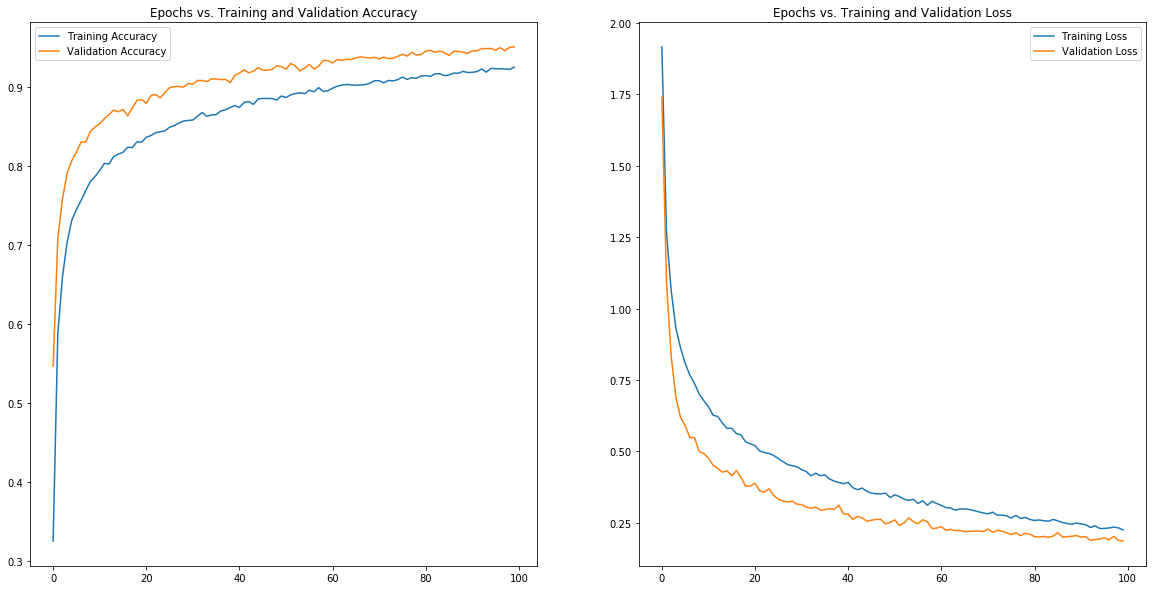

In [369]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [351]:
learning_rate= 0.0007
Lambda= 1.31e-05
iterations = 500
hidden_nodes=256
output_nodes=10
model = Sequential()
model.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model.add(BatchNormalization())
model.add(Dense(hidden_nodes,activation='relu'))
model.add(Dense(hidden_nodes,activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(hidden_nodes,activation='relu'))
model.add(Dense(hidden_nodes,activation='relu'))

model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
# adam optmizer with custom learning rate
adam= optimizers.Adam(lr=learning_rate)
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



In [352]:
#Fit the model
history = model.fit_generator(datagen.flow(x_train4, y_train1, batch_size=1000), validation_data=(x_val4,y_val1),epochs=100, verbose=1)

Epoch 1/100
42/42 [==============================] - 43s 789ms/step - loss: 2.2546 - accuracy: 0.1667 - val_loss: 2.0226 - val_accuracy: 0.3893
Epoch 2/100
42/42 [==============================] - 31s 742ms/step - loss: 1.5638 - accuracy: 0.4734 - val_loss: 1.5977 - val_accuracy: 0.6362
Epoch 3/100
42/42 [==============================] - 31s 730ms/step - loss: 1.2162 - accuracy: 0.6087 - val_loss: 1.2905 - val_accuracy: 0.7265
Epoch 4/100
42/42 [==============================] - 30s 723ms/step - loss: 1.0596 - accuracy: 0.6655 - val_loss: 1.0676 - val_accuracy: 0.7526
Epoch 5/100
42/42 [==============================] - 30s 722ms/step - loss: 0.9699 - accuracy: 0.6958 - val_loss: 0.8933 - val_accuracy: 0.7850
Epoch 6/100
42/42 [==============================] - 30s 723ms/step - loss: 0.9008 - accuracy: 0.7193 - val_loss: 0.7641 - val_accuracy: 0.8043
Epoch 7/100
42/42 [==============================] - 31s 740ms/step - loss: 0.8511 - accuracy: 0.7327 - val_loss: 0.6938 - val_accuracy:

In [353]:
model.evaluate(x_test4,y_test1)

563/563 [==============================] - 7s 6ms/step - loss: 0.3783 - accuracy: 0.8924


[0.37832292914390564, 0.8923888802528381]

In [ ]:
Tuning the model further to find the optimal learning rate and lambda values:

In [364]:
def model(epochs,lr,Lambda,verb=True):
    
    model2 = Sequential()
    model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
    model2.add(BatchNormalization()) 
    model2.add(Dense(512, kernel_initializer='he_normal'))
    model2.add(Activation('relu'))  
    #model2.add(Dropout(0.2))
    #model2.add(BatchNormalization())
    model2.add(Dense(256,kernel_initializer='he_normal'))
    model2.add(Activation('relu'))  
    #model2.add(Dropout(0.2))
    #model2.add(BatchNormalization())
    model2.add(Dense(256,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    model2.add(Dropout(0.2))
    #model2.add(BatchNormalization())
    model2.add(Dense(256,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model2.add(Dropout(0.2))
    #model2.add(BatchNormalization())
    model2.add(Dense(256,kernel_initializer='he_normal'))
    #model2.add(BatchNormalization())  
    model2.add(Activation('relu'))
    #model2.add(Dropout(0.2))
    model2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(Lambda)))
    #model2.summary()
    #model2.summary()
    optimizer=optimizers.Adam(lr=lr)
    model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=400),
                              epochs=epochs, validation_data=(x_val4, y_val1),shuffle=True
                              )
    scores=[]
    score = model2.evaluate(x_train4,y_train1, verbose=0)
    scores.append(score)
    score = model2.evaluate(x_val4,y_val1, verbose=0)
    scores.append(score)
    score = model2.evaluate(x_test4,y_test1, verbose=0)
    scores.append(score)
    return scores

In [ ]:
First 10 iterations of training are carried with random values of learning rate raised to powers in the range of -5 to -1 and random values of lambda raised to powers in the range of -7 to -2.

In [299]:
import math
results =[]
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-5.0, -1))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    score=model(10, lr, Lambda,0)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])
    
   

Epoch 1/10
42/42 [==============================] - 34s 746ms/step - loss: 2.8859 - accuracy: 0.1004 - val_loss: 2.3216 - val_accuracy: 0.1014
Epoch 2/10
42/42 [==============================] - 31s 745ms/step - loss: 2.8434 - accuracy: 0.1006 - val_loss: 2.3229 - val_accuracy: 0.1045
Epoch 3/10
42/42 [==============================] - 31s 741ms/step - loss: 2.8146 - accuracy: 0.1031 - val_loss: 2.3269 - val_accuracy: 0.1079
Epoch 4/10
42/42 [==============================] - 31s 735ms/step - loss: 2.7838 - accuracy: 0.1047 - val_loss: 2.3291 - val_accuracy: 0.1105
Epoch 5/10
42/42 [==============================] - 32s 757ms/step - loss: 2.7545 - accuracy: 0.1073 - val_loss: 2.3294 - val_accuracy: 0.1116
Epoch 6/10
42/42 [==============================] - 31s 735ms/step - loss: 2.7256 - accuracy: 0.1085 - val_loss: 2.3254 - val_accuracy: 0.1171
Epoch 7/10
42/42 [==============================] - 31s 738ms/step - loss: 2.6980 - accuracy: 0.1138 - val_loss: 2.3152 - val_accuracy: 0.1242

In [300]:
results

[['Loss is [2.2786455154418945, 0.15145237743854523] and Accuracy is [2.2787346839904785, 0.15154999494552612] with learing rate 1.0955118475884882e-05 and Lambda 0.0007751340961913987\n',
  [[2.2786455154418945, 0.15145237743854523],
   [2.2787346839904785, 0.15154999494552612],
   1.0955118475884882e-05,
   0.0007751340961913987]],
 ['Loss is [0.9537847638130188, 0.7009761929512024] and Accuracy is [0.9554591178894043, 0.7006833553314209] with learing rate 0.00039105159226949273 and Lambda 8.007731641924249e-05\n',
  [[0.9537847638130188, 0.7009761929512024],
   [0.9554591178894043, 0.7006833553314209],
   0.00039105159226949273,
   8.007731641924249e-05]],
 ['Loss is [2.2379186153411865, 0.18511904776096344] and Accuracy is [2.2394866943359375, 0.18418332934379578] with learing rate 2.1716336671638783e-05 and Lambda 0.001186978592379947\n',
  [[2.2379186153411865, 0.18511904776096344],
   [2.2394866943359375, 0.18418332934379578],
   2.1716336671638783e-05,
   0.001186978592379947]]

In [ ]:
From the above training results, it can be seen that the optimal training results are obtained in a very narrow range of powers for learning rate(between -4 to -2) as well as lambda(between -5 and -4).

In [ ]:
Training the defined neural network again for 10 iterations using the narrow range of power values for learning and lambda values:

In [365]:
import math
results =[]
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-4.0, -2))
    Lambda = math.pow(10, np.random.uniform(-5,-4))
    score=model(10, lr, Lambda,0)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])
    

Epoch 1/10
105/105 [==============================] - 48s 374ms/step - loss: 2.2468 - accuracy: 0.2133 - val_loss: 1.7019 - val_accuracy: 0.5621
Epoch 2/10
105/105 [==============================] - 37s 349ms/step - loss: 1.3485 - accuracy: 0.5547 - val_loss: 1.1021 - val_accuracy: 0.7195
Epoch 3/10
105/105 [==============================] - 37s 355ms/step - loss: 1.0955 - accuracy: 0.6501 - val_loss: 0.8069 - val_accuracy: 0.7658
Epoch 4/10
105/105 [==============================] - 37s 349ms/step - loss: 0.9565 - accuracy: 0.6931 - val_loss: 0.7086 - val_accuracy: 0.7801
Epoch 5/10
105/105 [==============================] - 37s 350ms/step - loss: 0.8756 - accuracy: 0.7228 - val_loss: 0.6260 - val_accuracy: 0.8077
Epoch 6/10
105/105 [==============================] - 37s 348ms/step - loss: 0.8098 - accuracy: 0.7447 - val_loss: 0.5789 - val_accuracy: 0.8242
Epoch 7/10
105/105 [==============================] - 37s 355ms/step - loss: 0.7703 - accuracy: 0.7589 - val_loss: 0.5581 - val_ac

In [366]:
results

[['Loss is [0.4785875678062439, 0.8482142686843872] and Accuracy is [0.5101473927497864, 0.8406000137329102] with learing rate 0.000782289645303637 and Lambda 9.428204124801175e-05\n',
  [[0.4785875678062439, 0.8482142686843872],
   [0.5101473927497864, 0.8406000137329102],
   0.000782289645303637,
   9.428204124801175e-05]],
 ['Loss is [0.48704293370246887, 0.8471190333366394] and Accuracy is [0.5111731886863708, 0.8412666916847229] with learing rate 0.00199472812492926 and Lambda 1.976563264189293e-05\n',
  [[0.48704293370246887, 0.8471190333366394],
   [0.5111731886863708, 0.8412666916847229],
   0.00199472812492926,
   1.976563264189293e-05]],
 ['Loss is [0.4997617304325104, 0.8458571434020996] and Accuracy is [0.5255870819091797, 0.8392500281333923] with learing rate 0.00027061865632012436 and Lambda 2.5860323505659943e-05\n',
  [[0.4997617304325104, 0.8458571434020996],
   [0.5255870819091797, 0.8392500281333923],
   0.00027061865632012436,
   2.5860323505659943e-05]],
 ['Loss is

In [ ]:
From the above results it can be seen that a learning rate of 0.00097 yields optimal result while any lambda value having a power of -5 is found to be effective as seen above.

In [ ]:
Setting lr to 0.00097 and lambda as 1e-5:

In [372]:
lr = 0.00097
Lambda = 1e-05
score=model(100, lr, Lambda,0)

Epoch 1/100
105/105 [==============================] - 53s 406ms/step - loss: 2.3465 - accuracy: 0.1962 - val_loss: 1.7887 - val_accuracy: 0.4940
Epoch 2/100
105/105 [==============================] - 37s 356ms/step - loss: 1.4032 - accuracy: 0.5276 - val_loss: 1.1067 - val_accuracy: 0.7113
Epoch 3/100
105/105 [==============================] - 36s 348ms/step - loss: 1.1180 - accuracy: 0.6374 - val_loss: 0.8238 - val_accuracy: 0.7594
Epoch 4/100
105/105 [==============================] - 37s 350ms/step - loss: 0.9677 - accuracy: 0.6908 - val_loss: 0.6837 - val_accuracy: 0.7936
Epoch 5/100
105/105 [==============================] - 37s 348ms/step - loss: 0.8872 - accuracy: 0.7152 - val_loss: 0.6547 - val_accuracy: 0.7955
Epoch 6/100
105/105 [==============================] - 40s 382ms/step - loss: 0.8291 - accuracy: 0.7390 - val_loss: 0.6185 - val_accuracy: 0.8092
Epoch 7/100
105/105 [==============================] - 37s 349ms/step - loss: 0.7830 - accuracy: 0.7558 - val_loss: 0.5528 -

In [373]:
score

[[0.09171751886606216, 0.9710952639579773],
 [0.19948576390743256, 0.9478499889373779],
 [0.4509453773498535, 0.8936111330986023]]

In [ ]:
The score is found to be 89.36% for the test set which is close to the training and validation accuracies.

In [ ]:
Observing performance with slight change in lr:

In [376]:
lr = 0.0009
Lambda = 1e-05
score=model(100, lr, Lambda,0)

Epoch 1/100
105/105 [==============================] - 63s 403ms/step - loss: 2.2659 - accuracy: 0.2022 - val_loss: 1.7163 - val_accuracy: 0.5503
Epoch 2/100
105/105 [==============================] - 38s 358ms/step - loss: 1.3457 - accuracy: 0.5508 - val_loss: 1.0945 - val_accuracy: 0.7142
Epoch 3/100
105/105 [==============================] - 38s 359ms/step - loss: 1.0796 - accuracy: 0.6545 - val_loss: 0.8529 - val_accuracy: 0.7509
Epoch 4/100
105/105 [==============================] - 38s 363ms/step - loss: 0.9518 - accuracy: 0.6960 - val_loss: 0.6961 - val_accuracy: 0.7863
Epoch 5/100
105/105 [==============================] - 37s 356ms/step - loss: 0.8712 - accuracy: 0.7234 - val_loss: 0.6313 - val_accuracy: 0.8047
Epoch 6/100
105/105 [==============================] - 38s 359ms/step - loss: 0.7998 - accuracy: 0.7473 - val_loss: 0.6015 - val_accuracy: 0.8173
Epoch 7/100
105/105 [==============================] - 37s 357ms/step - loss: 0.7589 - accuracy: 0.7578 - val_loss: 0.5672 -

In [377]:
score

[[0.08378493785858154, 0.9737856984138489],
 [0.19139741361141205, 0.9498999714851379],
 [0.4424935579299927, 0.8941666483879089]]

In [ ]:
The test accuracy is 89.41% and remains almost the same.

In [ ]:
Observing the performance with slight increase in lambda to 1.5e-5:

In [401]:
model2 = Sequential()
model2.add(Reshape((1024,), input_shape=(32,32,1), name='Input_layer'))
model2.add(BatchNormalization()) 
model2.add(Dense(512, kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
model2.add(Activation('relu'))  
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
#model2.add(BatchNormalization())
model2.add(Dense(256,kernel_initializer='he_normal'))
#model2.add(BatchNormalization())  
model2.add(Activation('relu'))
#model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax',kernel_regularizer=regularizers.l2(1.5e-5)))
model2.summary()

Model: "sequential_220"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Reshape)        (None, 1024)              0         
_________________________________________________________________
batch_normalization_362 (Bat (None, 1024)              4096      
_________________________________________________________________
dense_1207 (Dense)           (None, 512)               524800    
_________________________________________________________________
activation_983 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_1208 (Dense)           (None, 256)               131328    
_________________________________________________________________
activation_984 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_1209 (Dense)           (None, 256)            

In [402]:
optimizer=optimizers.Adam(lr=9e-4)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model2.fit_generator(datagen.flow(x_train4, y_train1, batch_size=400),
                          epochs=100, validation_data=(x_val4, y_val1),shuffle=True
                          )

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1801: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
105/105 [==============================] - 43s 369ms/step - loss: 2.3365 - accuracy: 0.1767 - val_loss: 1.7495 - val_accuracy: 0.5138
Epoch 2/100
105/105 [==============================] - 37s 356ms/step - loss: 1.4157 - accuracy: 0.5299 - val_loss: 1.0876 - val_accuracy: 0.7125
Epoch 3/100
105/105 [==============================] - 37s 356ms/step - loss: 1.1116 - accuracy: 0.6438 - val_loss: 0.8169 - val_accuracy: 0.7605
Epoch 4/100
105/105 [==============================] - 37s 351ms/step - loss: 0.9687 - accuracy: 0.6934 - val_loss: 0.7146 - val_accuracy: 0.7794
Epoch 5/100
105/105 [==============================] - 37s 354ms/step - loss: 0.8714 - accuracy: 0.7233 - val_loss: 0.6350 - val_accuracy: 0.8065
Epoch 6/100
105/105 [==============================] - 37s 354ms/step - loss: 0.8272 - accuracy: 0.7395 - val_loss: 0.6063 - val_accuracy: 0.8113
Epoch 7/100
105/105 [==============================] - 36s 347ms/step - loss: 0.7807 - accuracy: 0.7528 - val_loss: 0.5585 -

In [ ]:
Evaluating model on test set:
    The accuracy for test set continues to lie in the range of 89%

In [403]:
model2.evaluate(x_test4,y_test1)

563/563 [==============================] - 7s 8ms/step - loss: 0.4465 - accuracy: 0.8901


[0.44651374220848083, 0.8901110887527466]

In [ ]:
Plotting the accuracy,val_accuracy vs number of epochs and the loss,val_loss vs number of epochs graphs:

In [404]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

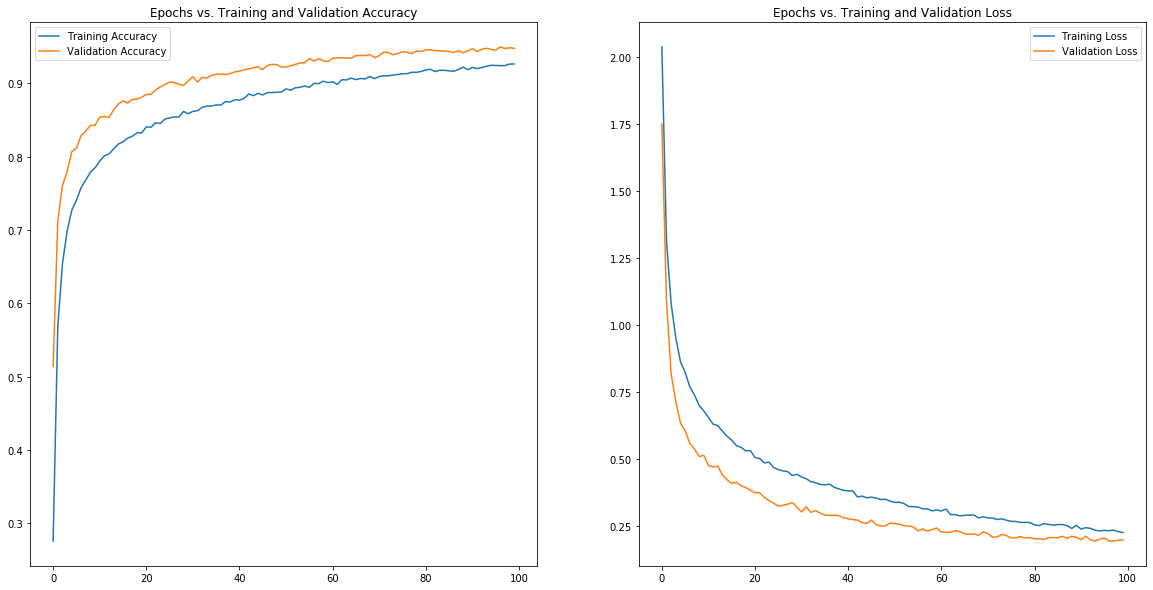

In [405]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [ ]:
i)From the above graphs, it can be seen that the validation accuracy is higher than of training accuracy while validation loss is lesser than that of training loss. The performance begins to flatten after around 60 epochs with slight fluctuations throughout.
While there is not much difference seen in the loss values for training and validation at the beginning, the validation accuracy is found to be around 50% at the first epoch while the training accuracy is less than 30%. With the addition of dropout, batch normalization and l2 regularizer, there is not much overfitting.
ii) Due to the use of dropout while training, the predictions are found to be worse due to lack of 20% neurons while in the case of validation, all the neurons are utlized thereby leading to better results for validation data.
iii) The samples in the validation data may be relatively easier to predict as compared to the training samples.

In [ ]:
Generating the predictions and confusion matrix:

In [406]:
y_pred=model2.predict(x_test4)

In [408]:
from sklearn.metrics import confusion_matrix

In [410]:
matrix = confusion_matrix(y_test1.argmax(axis=1), y_pred.argmax(axis=1))

In [411]:
matrix

array([[1667,   40,    3,    9,   13,    6,   18,   13,   14,   31],
       [  19, 1651,    6,   30,   38,   15,   20,   23,   14,   12],
       [  17,   22, 1634,   27,   18,   10,    5,   33,   14,   23],
       [  14,   20,   20, 1425,    8,  121,   25,   19,   36,   31],
       [  14,   32,   12,   12, 1669,    6,   23,    5,   17,   22],
       [  10,   10,   10,   51,    7, 1573,   51,    8,   27,   21],
       [  26,   15,   10,   10,   23,   51, 1621,    7,   56,   13],
       [  13,   55,   35,   14,   10,    9,    7, 1648,    6,   11],
       [  24,   30,   12,   26,   12,   25,   79,    9, 1554,   41],
       [  46,   21,   26,   25,   22,   36,    8,   11,   29, 1580]],
      dtype=int64)

In [ ]:
From the confusion matrix above, it can be seen that y=5 has the most number of misclassifications and has been predicted as 3 the highest number of times.

In [ ]:
Displaying the test inputs along with the test outputs and predicted outputs as the heading:

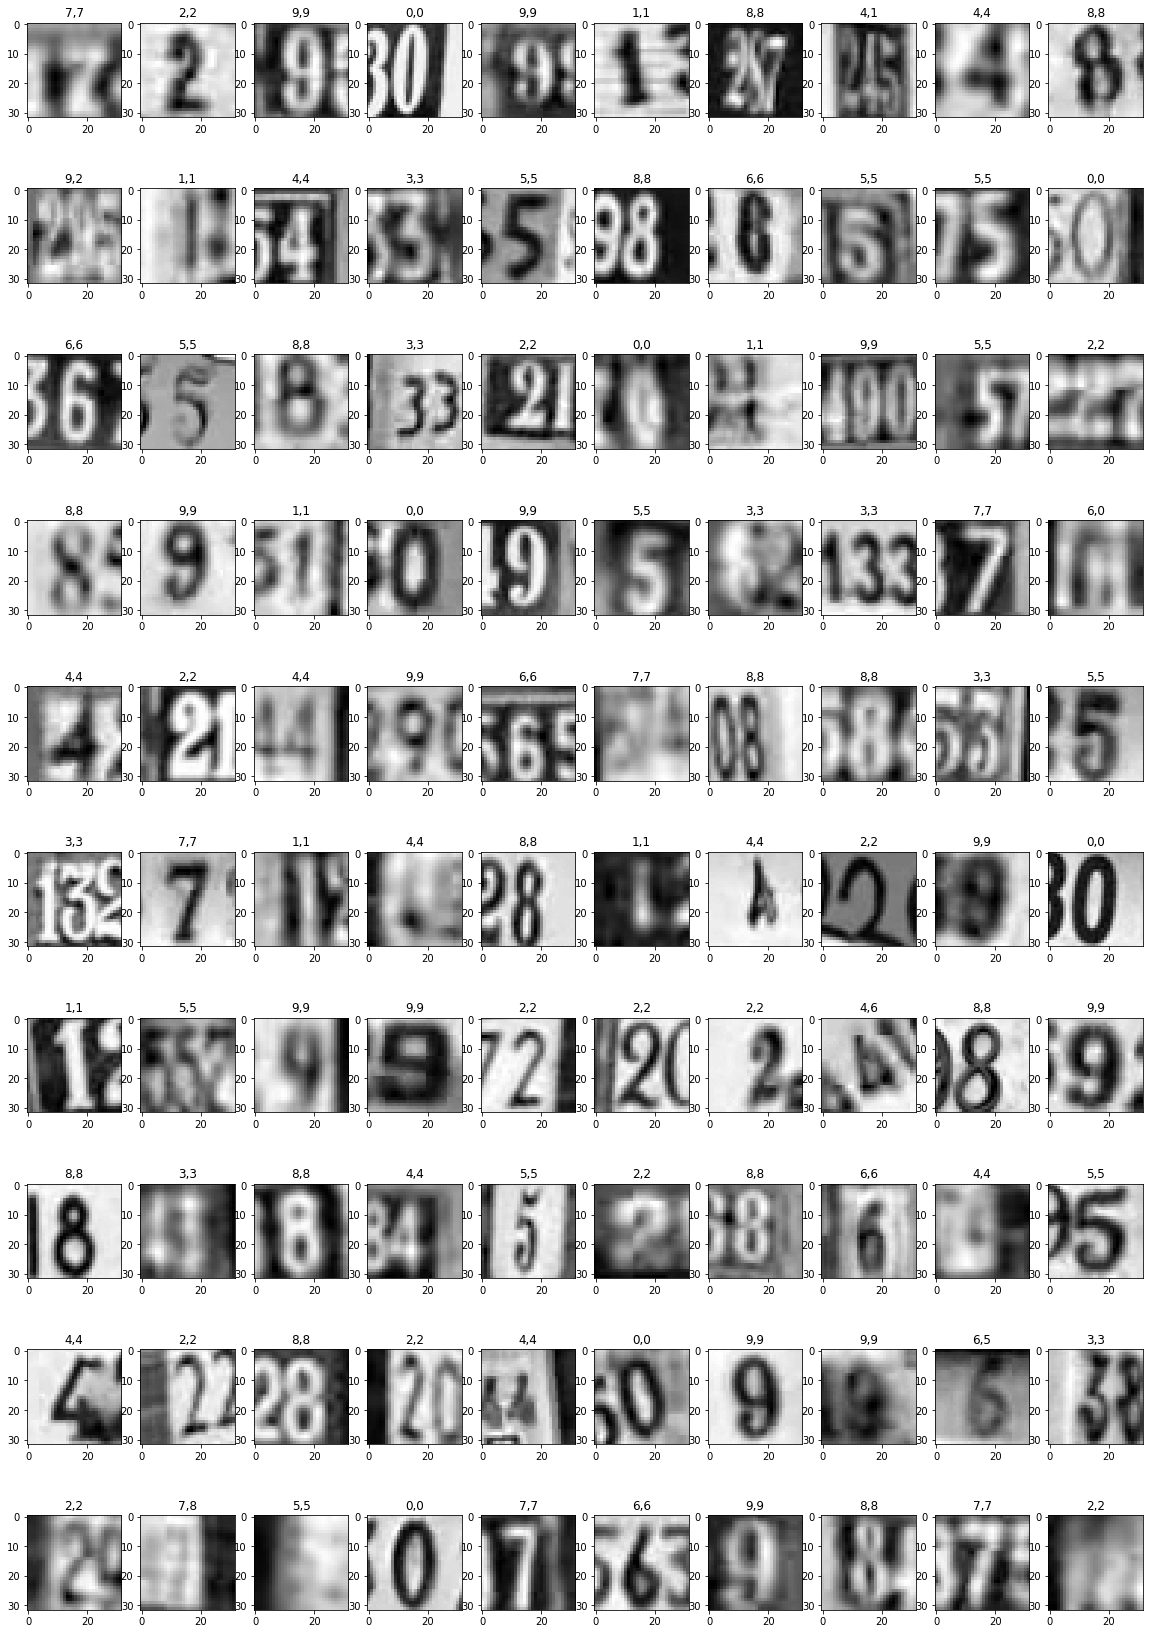

In [436]:
fig=plt.figure(figsize=(20,30))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=x_test[i]
    ax=fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    ax.set_title(y_test1[i].argmax(axis=0).astype(str)+','+y_pred[i].argmax(axis=0).astype(str))

plt.show()

In [ ]:
From the results above, most of the predictions are found to be correct in the given samples.

In [ ]:
Conclusion:
    1) Predicting Signal Quality:
        i) The presence of outliers and correlation seems to affect the performance and is found to be slightly better with winsorization. 
        ii) The use of ADASYN resampling technique has found to balance the classes and thus found to make the performance better, It also provides as a means of data augmentation.
        iii) The model fits better with the addition of regularization. The addition of hidden layers seems to give only a slight improvement in performance.
        iv) The use of PCA in the case of classification has found to be effective while that in regression yields poor performance.
    
    2) Recognizing the characters in SVHN Dataset:
        i) The performance is better with batch normalization,dropout and regularization and has helped prevent overfitting,
        ii) Image augmentation serves to be useful for training the neural network and has yielded better prediction results as well.
        iii) The learning rate and lambda values prove to be very significant in determining the performance of the model.
    The hyperparameter tuning,though time consuming, in both cases has helped improve the performance. 